# Data loading and pre processing

In [ ]:
# getting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# declaring image folder path
data_path = '/content/drive/MyDrive/Colab Notebooks/Osteosercoma/Sorted Dataset'

In [ ]:
 # defining transformation
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

transforms = transforms.Compose([
    transforms.Resize((224,224)),
    # transforms.Resize((229,229)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
                        ])

In [ ]:
dataset = torchvision.datasets.ImageFolder(root= data_path, transform= transforms)

In [ ]:
print("total samples in dataset: ", len(dataset))

total samples in dataset:  1144


In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
num_workers = 0
batch_size = 16

# obtain training indices that will be used for validation
valid_size= 0.2 # taking 20% data as our test set
num_data = len(dataset)
indices = list(range(num_data))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_data))
train_idx, test_idx = indices[split:], indices[:split]

print('After splitting train data: ',len(train_idx))
print('After splitting test data: ',len(test_idx))

# define samplers for obtaining training and test batches
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
    sampler=test_sampler, num_workers=num_workers)
# image classes
classes = ['Non-Tumor', 'Non-Viable-Tumor', 'Viable']

After splitting train data:  916
After splitting test data:  228


In [ ]:
%matplotlib inline

# helper function to display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

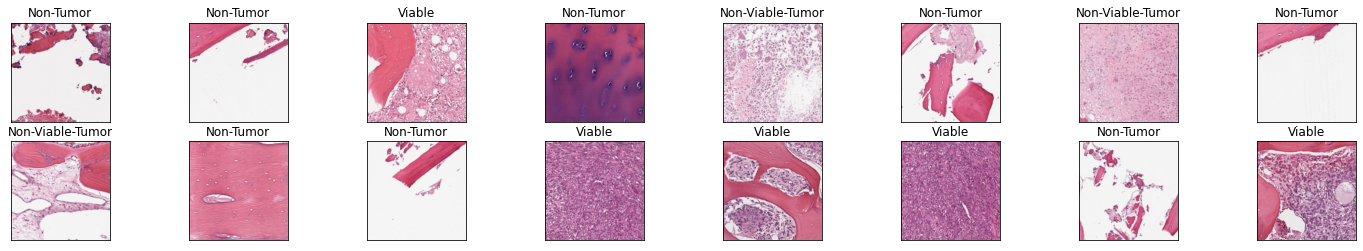

In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # Converted Image to numpy

# plot the images in the batch, along with the corresponding labels

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 16/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

## Making train and test set for feature extraction (No need this shell)

In [ ]:
# converting train set into numpy array and stores into a list 

train_images = []
train_labels = []

for data, target in train_loader:
  image = data.numpy()
  label = target.numpy()
  label = label.astype(int)
  train_images.append(image)
  train_labels.append(label)


In [ ]:
# As we are getting data from dataloader, so data are inserted as batch size
# that's why we need to convert this into 1D list 
from itertools import chain
train_labels = list(chain.from_iterable(train_labels))
train_images = list(chain.from_iterable(train_images))

In [ ]:
print("Number of train images: ", len(train_images))
print("Numbar of train labels: ", len(train_labels))
print("Shape of a single image: ", train_images[1].shape)

Number of train images:  916
Numbar of train labels:  916
Shape of a single image:  (3, 224, 224)


In [ ]:
# converting test set into numpy array and stores into a list 

test_images = []
test_labels = []

for data, target in test_loader:
  # converting tensors to numpy
  image = data.numpy()

  # converting targets to numpy 
  label = target.numpy()
  label = label.astype(int)

  # appending those data into list
  test_images.append(image)
  test_labels.append(label)


In [ ]:
# As we are getting data from dataloader, so data are inserted as batch size
# that's why we need to convert this into 1D list 
from itertools import chain
test_labels = list(chain.from_iterable(test_labels))
test_images = list(chain.from_iterable(test_images))

In [ ]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

print("Shape of train images: ", train_images.shape)
print("Type of train images: ", type(train_images))

Shape of train images:  (916, 3, 224, 224)
Type of train images:  <class 'numpy.ndarray'>


In [ ]:
#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

print("Shape of test images: ", test_images.shape)
print("Type of test images: ", type(test_images))

Shape of test images:  (228, 3, 224, 224)
Type of test images:  <class 'numpy.ndarray'>


In [ ]:
# reshaping train images and test images 
train_images = train_images.reshape(train_images.shape[0], 224, 224, 3)
test_images = test_images.reshape(test_images.shape[0], 224,224,3)

In [ ]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels, test_images, test_labels

In [ ]:
print(x_train.shape)
print(x_test.shape)

(916, 224, 224, 3)
(228, 224, 224, 3)


In [ ]:
print("Shape of training labels: ", y_train.shape)
print("Shape of test labels: ", y_test.shape)

Shape of training labels:  (916,)
Shape of test labels:  (228,)


# Loading Xception model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# we are taking Xception model with imagenet weigths and excluding top layer
# we also define our input shape as 224 x 224 x 3

base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
# freezzing the weigths
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
# creating new model on the top as we will extract 1024 from this model

inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.

x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)

# A Dense classifier with a 1024 unit
outputs = keras.layers.Dense(1024)(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
Total params: 22,959,656
Trainable params: 2,098,176
Non-trainable params: 20,861,480
_________________________________________________________________


# Training model

In [ ]:
# # If we want to update our top layer wights
# model.compile(optimizer=keras.optimizers.Adam(),
#               loss=keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=[keras.metrics.BinaryAccuracy()])
# model.fit(x_train, epochs=20, callbacks=..., validation_data=...)

**Fine tuning**

In [ ]:
# # Unfreeze the base_model. Note that it keeps running in inference mode
# # since we passed `training=False` when calling it. This means that
# # the batchnorm layers will not update their batch statistics.
# # This prevents the batchnorm layers from undoing all the training
# # we've done so far.

# base_model.trainable = True
# model.summary()

# model.compile(
#     optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
#     loss=keras.losses.BinaryCrossentropy(from_logits=True),
#     metrics=[keras.metrics.BinaryAccuracy()],
# )

# epochs = 10
# model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

# Feature Extraction

In [ ]:
# feature extraction for training daata 
x_train_features = model.predict(x_train)

29/29 [==============================] - 184s 6s/step


In [ ]:
print("Shape of our train features after feature extraction: ", x_train_features.shape)

Shape of our train features after feature extraction:  (916, 1024)


In [ ]:
# feature extraction for test data 
x_test_features = model.predict(x_test)

8/8 [==============================] - 43s 5s/step


In [ ]:
print("Shape of our test features after feature extraction: ", x_test_features.shape)

Shape of our test features after feature extraction:  (228, 1024)


# ROC-AUC 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
train_X = x_train_features
train_Y = y_train
test_X = x_test_features
test_Y = y_test

In [ ]:
# label binarize 
from sklearn.preprocessing import label_binarize
# for train labels 
train_Y = label_binarize(train_Y, classes=[0, 1, 2])
n_classes = train_Y.shape[1]
print(f"Number of class: {n_classes}")

# for test labels 
test_Y = label_binarize(test_Y, classes=[0,1,2])
n_classes = test_Y.shape[1]
print(f"Number of class: {n_classes}")

Number of class: 3
Number of class: 3


In [ ]:
# for Random Forest 
# importing random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Learn to predict each class against the other
rf_classifier = OneVsRestClassifier(
    RandomForestClassifier(n_estimators = 64, criterion = 'entropy', random_state = 42)
)
y_score = rf_classifier.fit(train_X, train_Y).predict_proba(test_X)

 # Compute ROC curve and ROC area for each class
rf_fpr = dict()
rf_tpr = dict()
rf_roc_auc = dict()
for i in range(n_classes):
    rf_fpr[i], rf_tpr[i], _ = roc_curve(test_Y[:, i], y_score[:, i])
    rf_roc_auc[i] = auc(rf_fpr[i], rf_tpr[i])

# Compute micro-average ROC curve and ROC area
rf_fpr["micro"], rf_tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
rf_roc_auc["micro"] = auc(rf_fpr["micro"], rf_tpr["micro"])

# getting micro average 
print(f"Micro average: {rf_roc_auc['micro']}")

# macro average 
# First aggregate all false positive rates
rf_all_fpr = np.unique(np.concatenate([rf_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
rf_mean_tpr = np.zeros_like(rf_all_fpr)
for i in range(n_classes):
    rf_mean_tpr += np.interp(rf_all_fpr, rf_fpr[i], rf_tpr[i])

# Finally average it and compute AUC
rf_mean_tpr /= n_classes

rf_fpr["macro"] = rf_all_fpr
rf_tpr["macro"] = rf_mean_tpr
rf_roc_auc["macro"] = auc(rf_fpr["macro"], rf_tpr["macro"])

print(f"Macro average ROC: {rf_roc_auc['macro']}")

Micro average: 0.9160270467836258
Macro average ROC: 0.9125072378328704


In [ ]:
# XGBoost
import xgboost as xgb

# Learn to predict each class against the other
xg_classifier = OneVsRestClassifier(
    xgb.XGBClassifier(learning_rate= 0.08)
)
y_score = xg_classifier.fit(train_X, train_Y).predict_proba(test_X)

 # Compute ROC curve and ROC area for each class
xg_fpr = dict()
xg_tpr = dict()
xg_roc_auc = dict()
for i in range(n_classes):
    xg_fpr[i], xg_tpr[i], _ = roc_curve(test_Y[:, i], y_score[:, i])
    xg_roc_auc[i] = auc(xg_fpr[i], xg_tpr[i])

# Compute micro-average ROC curve and ROC area
xg_fpr["micro"], xg_tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
xg_roc_auc["micro"] = auc(xg_fpr["micro"], xg_tpr["micro"])

# getting micro average 
print(f"Micro average: {xg_roc_auc['micro']}")

# macro average 
# First aggregate all false positive rates
xg_all_fpr = np.unique(np.concatenate([xg_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
xg_mean_tpr = np.zeros_like(xg_all_fpr)
for i in range(n_classes):
    xg_mean_tpr += np.interp(xg_all_fpr, xg_fpr[i], xg_tpr[i])

# Finally average it and compute AUC
xg_mean_tpr /= n_classes

xg_fpr["macro"] = xg_all_fpr
xg_tpr["macro"] = xg_mean_tpr
xg_roc_auc["macro"] = auc(xg_fpr["macro"], xg_tpr["macro"])

print(f"Macro average ROC: {xg_roc_auc['macro']}")

Micro average: 0.9287088334872269
Macro average ROC: 0.9243196498041456


In [ ]:
# For LGBM 
from lightgbm import LGBMClassifier

# Learn to predict each class against the other
lgbm_classifier = OneVsRestClassifier(
    LGBMClassifier()
)
y_score = lgbm_classifier.fit(train_X, train_Y).predict_proba(test_X)

 # Compute ROC curve and ROC area for each class
lgbm_fpr = dict()
lgbm_tpr = dict()
lgbm_roc_auc = dict()
for i in range(n_classes):
    lgbm_fpr[i], lgbm_tpr[i], _ = roc_curve(test_Y[:, i], y_score[:, i])
    lgbm_roc_auc[i] = auc(lgbm_fpr[i], lgbm_tpr[i])

# Compute micro-average ROC curve and ROC area
lgbm_fpr["micro"], lgbm_tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
lgbm_roc_auc["micro"] = auc(lgbm_fpr["micro"], lgbm_tpr["micro"])

# getting micro average 
print(f"Micro average: {lgbm_roc_auc['micro']}")

# macro average 
# First aggregate all false positive rates
lgbm_all_fpr = np.unique(np.concatenate([lgbm_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
lgbm_mean_tpr = np.zeros_like(lgbm_all_fpr)
for i in range(n_classes):
    lgbm_mean_tpr += np.interp(lgbm_all_fpr, lgbm_fpr[i], lgbm_tpr[i])

# Finally average it and compute AUC
lgbm_mean_tpr /= n_classes

lgbm_fpr["macro"] = lgbm_all_fpr
lgbm_tpr["macro"] = lgbm_mean_tpr
lgbm_roc_auc["macro"] = auc(lgbm_fpr["macro"], lgbm_tpr["macro"])

print(f"Macro average ROC: {lgbm_roc_auc['macro']}")

Micro average: 0.9348261003385657
Macro average ROC: 0.9306154869095243


In [ ]:
# For Decision tree
from sklearn.tree import DecisionTreeClassifier

# Learn to predict each class against the other
dt_classifier = OneVsRestClassifier(
    DecisionTreeClassifier(max_depth =7,ccp_alpha=0.015,  random_state = 42)  # default ccp gives worst result
)
y_score = dt_classifier.fit(train_X, train_Y).predict_proba(test_X)

 # Compute ROC curve and ROC area for each class
dt_fpr = dict()
dt_tpr = dict()
dt_roc_auc = dict()
for i in range(n_classes):
    dt_fpr[i], dt_tpr[i], _ = roc_curve(test_Y[:, i], y_score[:, i])
    dt_roc_auc[i] = auc(dt_fpr[i], dt_tpr[i])

# Compute micro-average ROC curve and ROC area
dt_fpr["micro"], dt_tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
dt_roc_auc["micro"] = auc(dt_fpr["micro"], dt_tpr["micro"])

# getting micro average 
print(f"Micro average: {dt_roc_auc['micro']}")

# macro average 
# First aggregate all false positive rates
dt_all_fpr = np.unique(np.concatenate([dt_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
dt_mean_tpr = np.zeros_like(dt_all_fpr)
for i in range(n_classes):
    dt_mean_tpr += np.interp(dt_all_fpr, dt_fpr[i], dt_tpr[i])

# Finally average it and compute AUC
dt_mean_tpr /= n_classes

dt_fpr["macro"] = dt_all_fpr
dt_tpr["macro"] = dt_mean_tpr
dt_roc_auc["macro"] = auc(dt_fpr["macro"], dt_tpr["macro"])

print(f"Macro average ROC: {dt_roc_auc['macro']}")

Micro average: 0.7868094028931979
Macro average ROC: 0.7615551093197602


In [ ]:
from sklearn.neural_network import MLPClassifier
# Learn to predict each class against the other
mlp_classifier = OneVsRestClassifier(
    MLPClassifier(random_state=1, max_iter=200)
)
y_score = mlp_classifier.fit(train_X, train_Y).predict_proba(test_X)

# Compute ROC curve and ROC area for each class
mlp_fpr = dict()
mlp_tpr = dict()
mlp_roc_auc = dict()
for i in range(n_classes):
    mlp_fpr[i], mlp_tpr[i], _ = roc_curve(test_Y[:, i], y_score[:, i])
    mlp_roc_auc[i] = auc(mlp_fpr[i], mlp_tpr[i])

# Compute micro-average ROC curve and ROC area
mlp_fpr["micro"], mlp_tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
mlp_roc_auc["micro"] = auc(mlp_fpr["micro"], mlp_tpr["micro"])

print(f"Micro average: {mlp_roc_auc['micro']}")

# First aggregate all false positive rates
mlp_all_fpr = np.unique(np.concatenate([mlp_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mlp_mean_tpr = np.zeros_like(mlp_all_fpr)
for i in range(n_classes):
    mlp_mean_tpr += np.interp(mlp_all_fpr, mlp_fpr[i], mlp_tpr[i])

# Finally average it and compute AUC
mlp_mean_tpr /= n_classes

mlp_fpr["macro"] = mlp_all_fpr
mlp_tpr["macro"] = mlp_mean_tpr
mlp_roc_auc["macro"] = auc(mlp_fpr["macro"], mlp_tpr["macro"])

print(f"ROC Macro: {mlp_roc_auc['macro']}")
print(f"Micro average: {mlp_roc_auc['micro']}")

Micro average: 0.9382406124961526
ROC Macro: 0.9347229687480524
Micro average: 0.9382406124961526


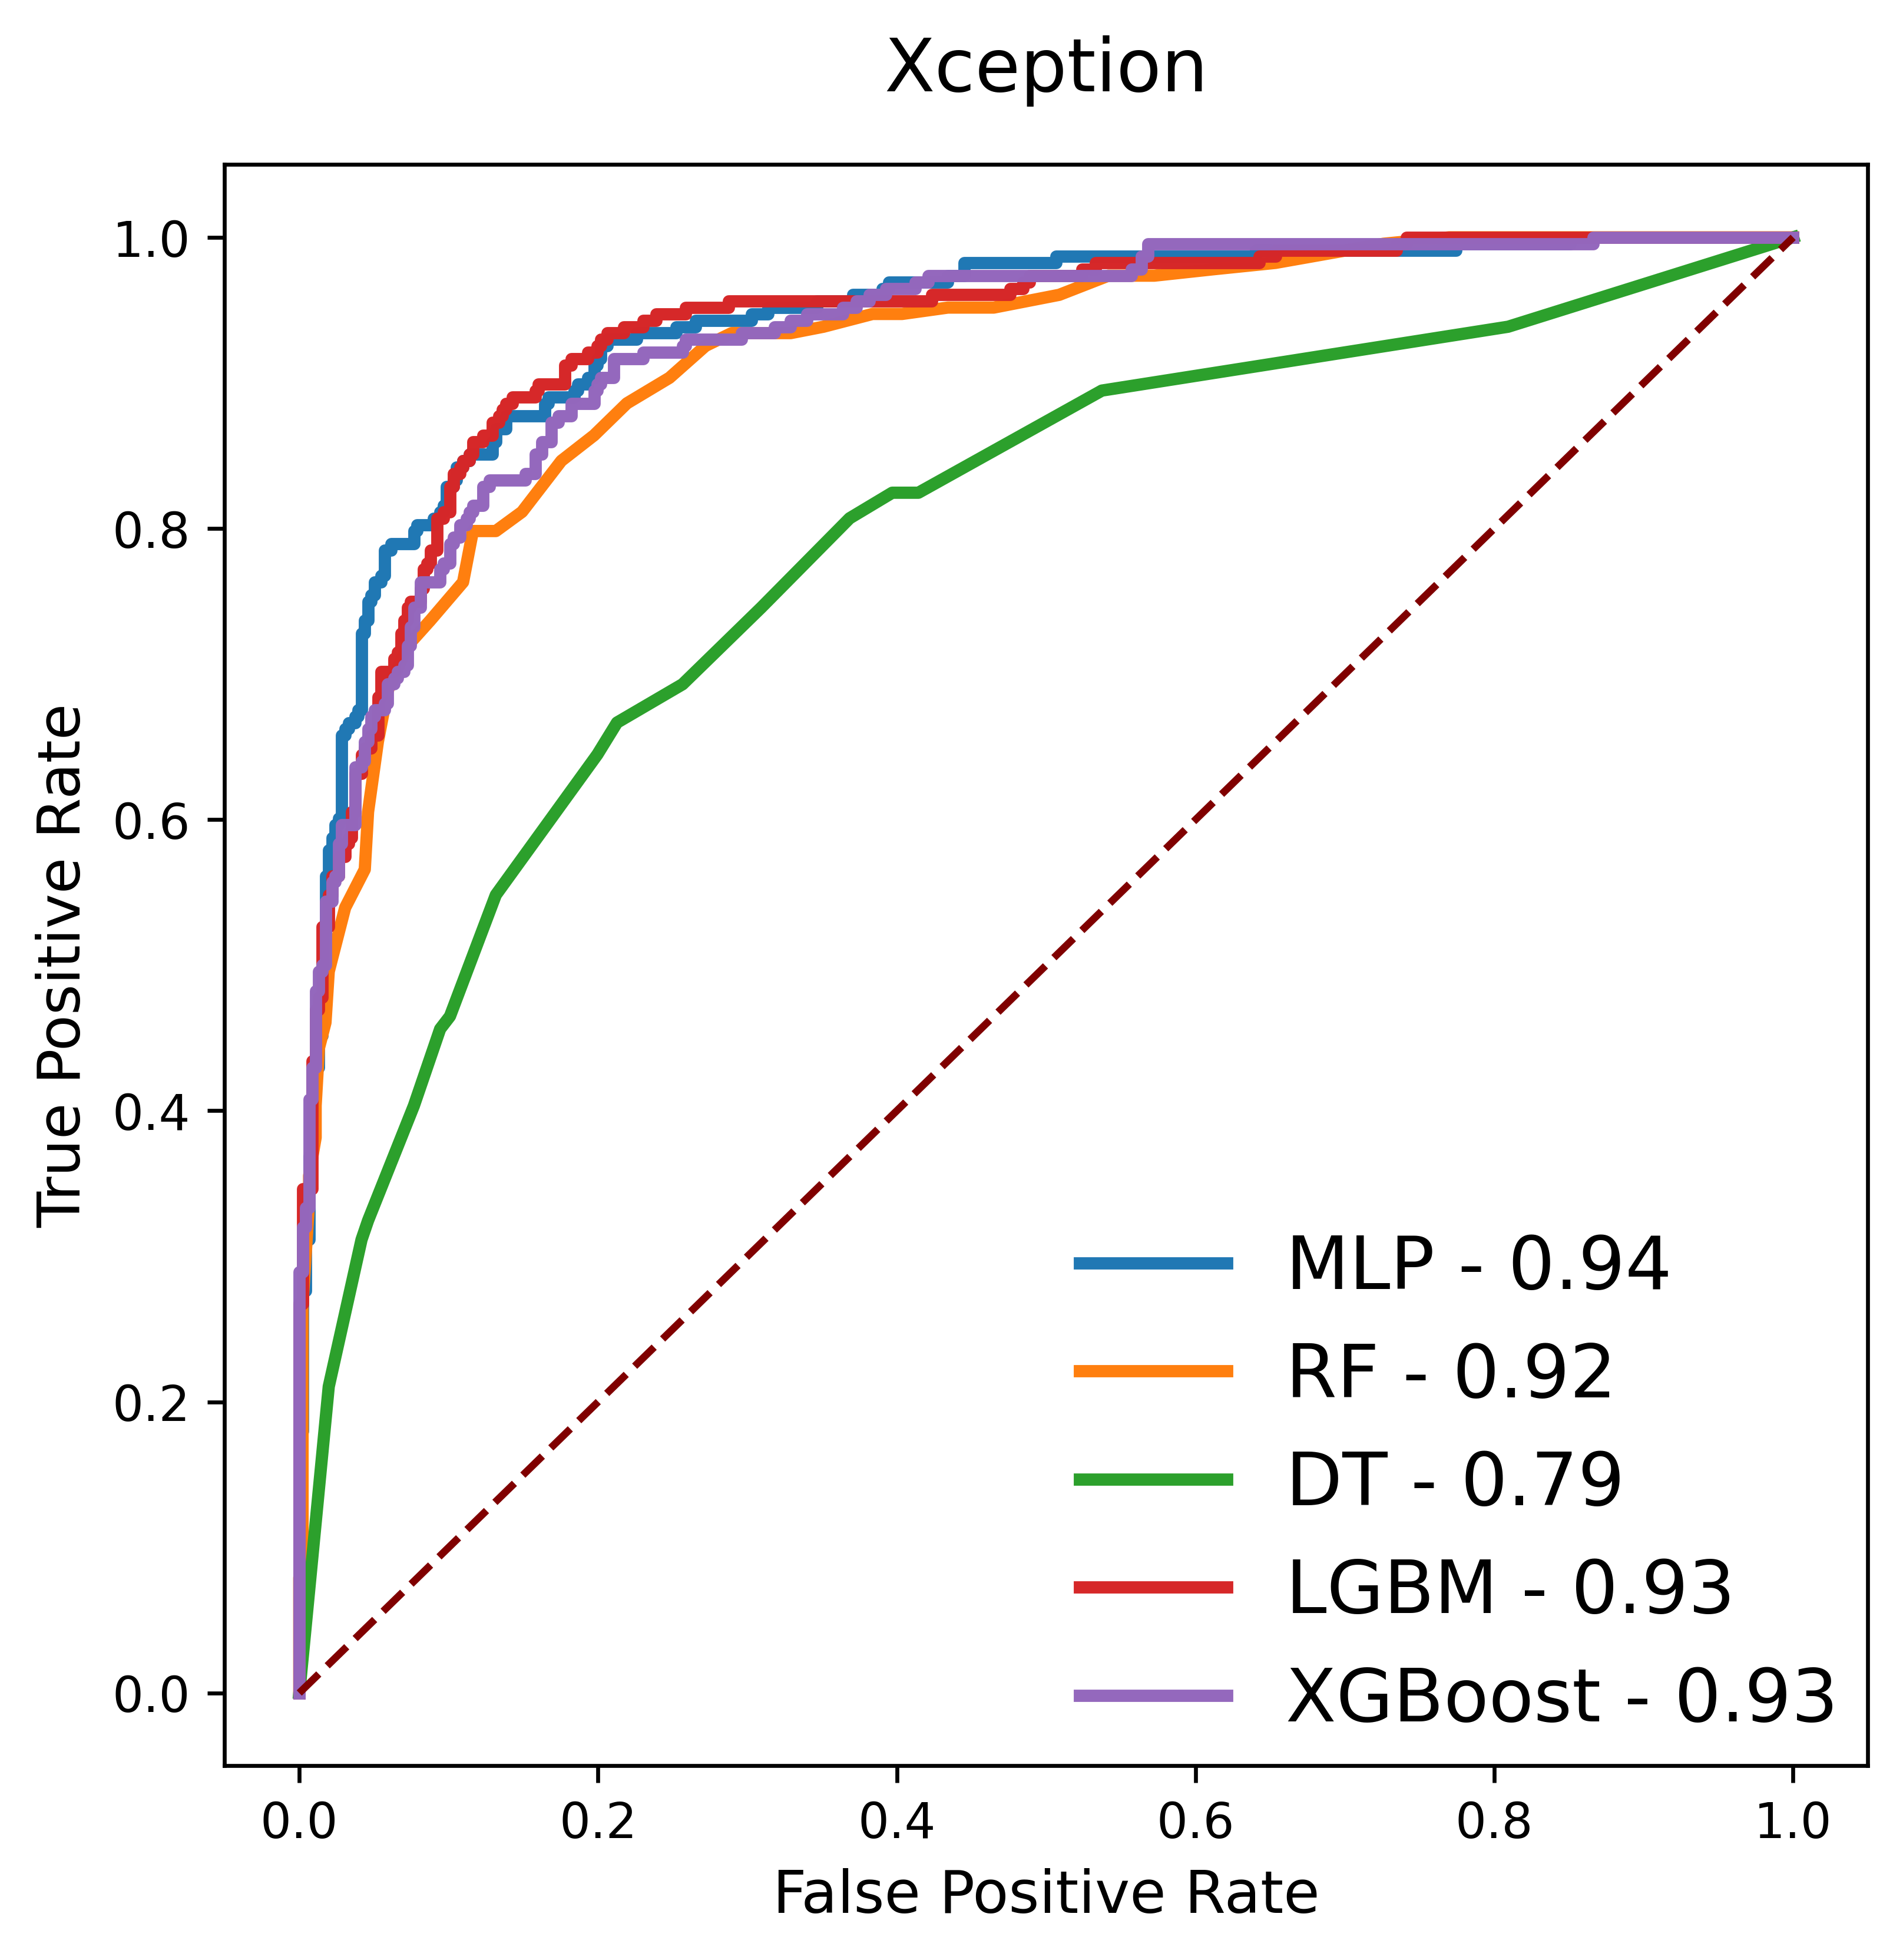

In [ ]:
# Plot all ROC curves
plt_1 = plt.figure(figsize=(6,6))
plt.plot(
    mlp_fpr["micro"],
    mlp_tpr["micro"],
    label="MLP - {0:0.2f}".format(mlp_roc_auc["micro"]),
    
    alpha = 2,
    linewidth=2.5,
)

plt.plot(
    rf_fpr["micro"],
    rf_tpr["micro"],
    label="RF - {0:0.2f}".format(rf_roc_auc["micro"]),
    
    alpha = 2,
    linewidth=2.5,
)

plt.plot(
    dt_fpr["micro"],
    dt_tpr["micro"],
    label="DT - {0:0.2f}".format(dt_roc_auc["micro"]),
    
    alpha = 1,
    linewidth=2.5,
)

plt.plot(
    lgbm_fpr["micro"],
    lgbm_tpr["micro"],
    label="LGBM - {0:0.2f}".format(lgbm_roc_auc["micro"]),
    
    alpha = 2,
    linewidth=2.5,
)
plt.plot(
    xg_fpr['micro'],
    xg_tpr['micro'],
    
    alpha = 2, 
    linewidth=2.5,
    label="XGBoost - %0.2f" % xg_roc_auc['micro'],
)

# change resolution
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

plt.plot([0, 1], [0, 1], "k--", lw=1.5, color='maroon')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.title("Xception", pad= 15, fontsize= 15)
plt.legend(loc="lower right", frameon=False, fontsize=15,borderaxespad=0.)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Osteosercoma/Xception.png")
plt.show()

In [ ]:
# starts from below

# Random Forest

In [ ]:
# importing random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fitting Random Forest Classification to the Training set
rf_classifier = RandomForestClassifier(n_estimators = 64, criterion = 'entropy', random_state = 42)
rf_classifier.fit(x_train_features, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=64, random_state=42)

In [ ]:
# prediciting on test data
rf_pred = rf_classifier.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, rf_pred)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.781


**ROC-AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.908


**Matthews Correlation Coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, rf_pred)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.649


**confusion matrix**

In [ ]:
# Function to plot confusion matrix

from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize= False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
        title = "Normalized Confusion Matrix"
    else:
        # print('Confusion matrix, without normalization')
        title = "Confusion Matrix"

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

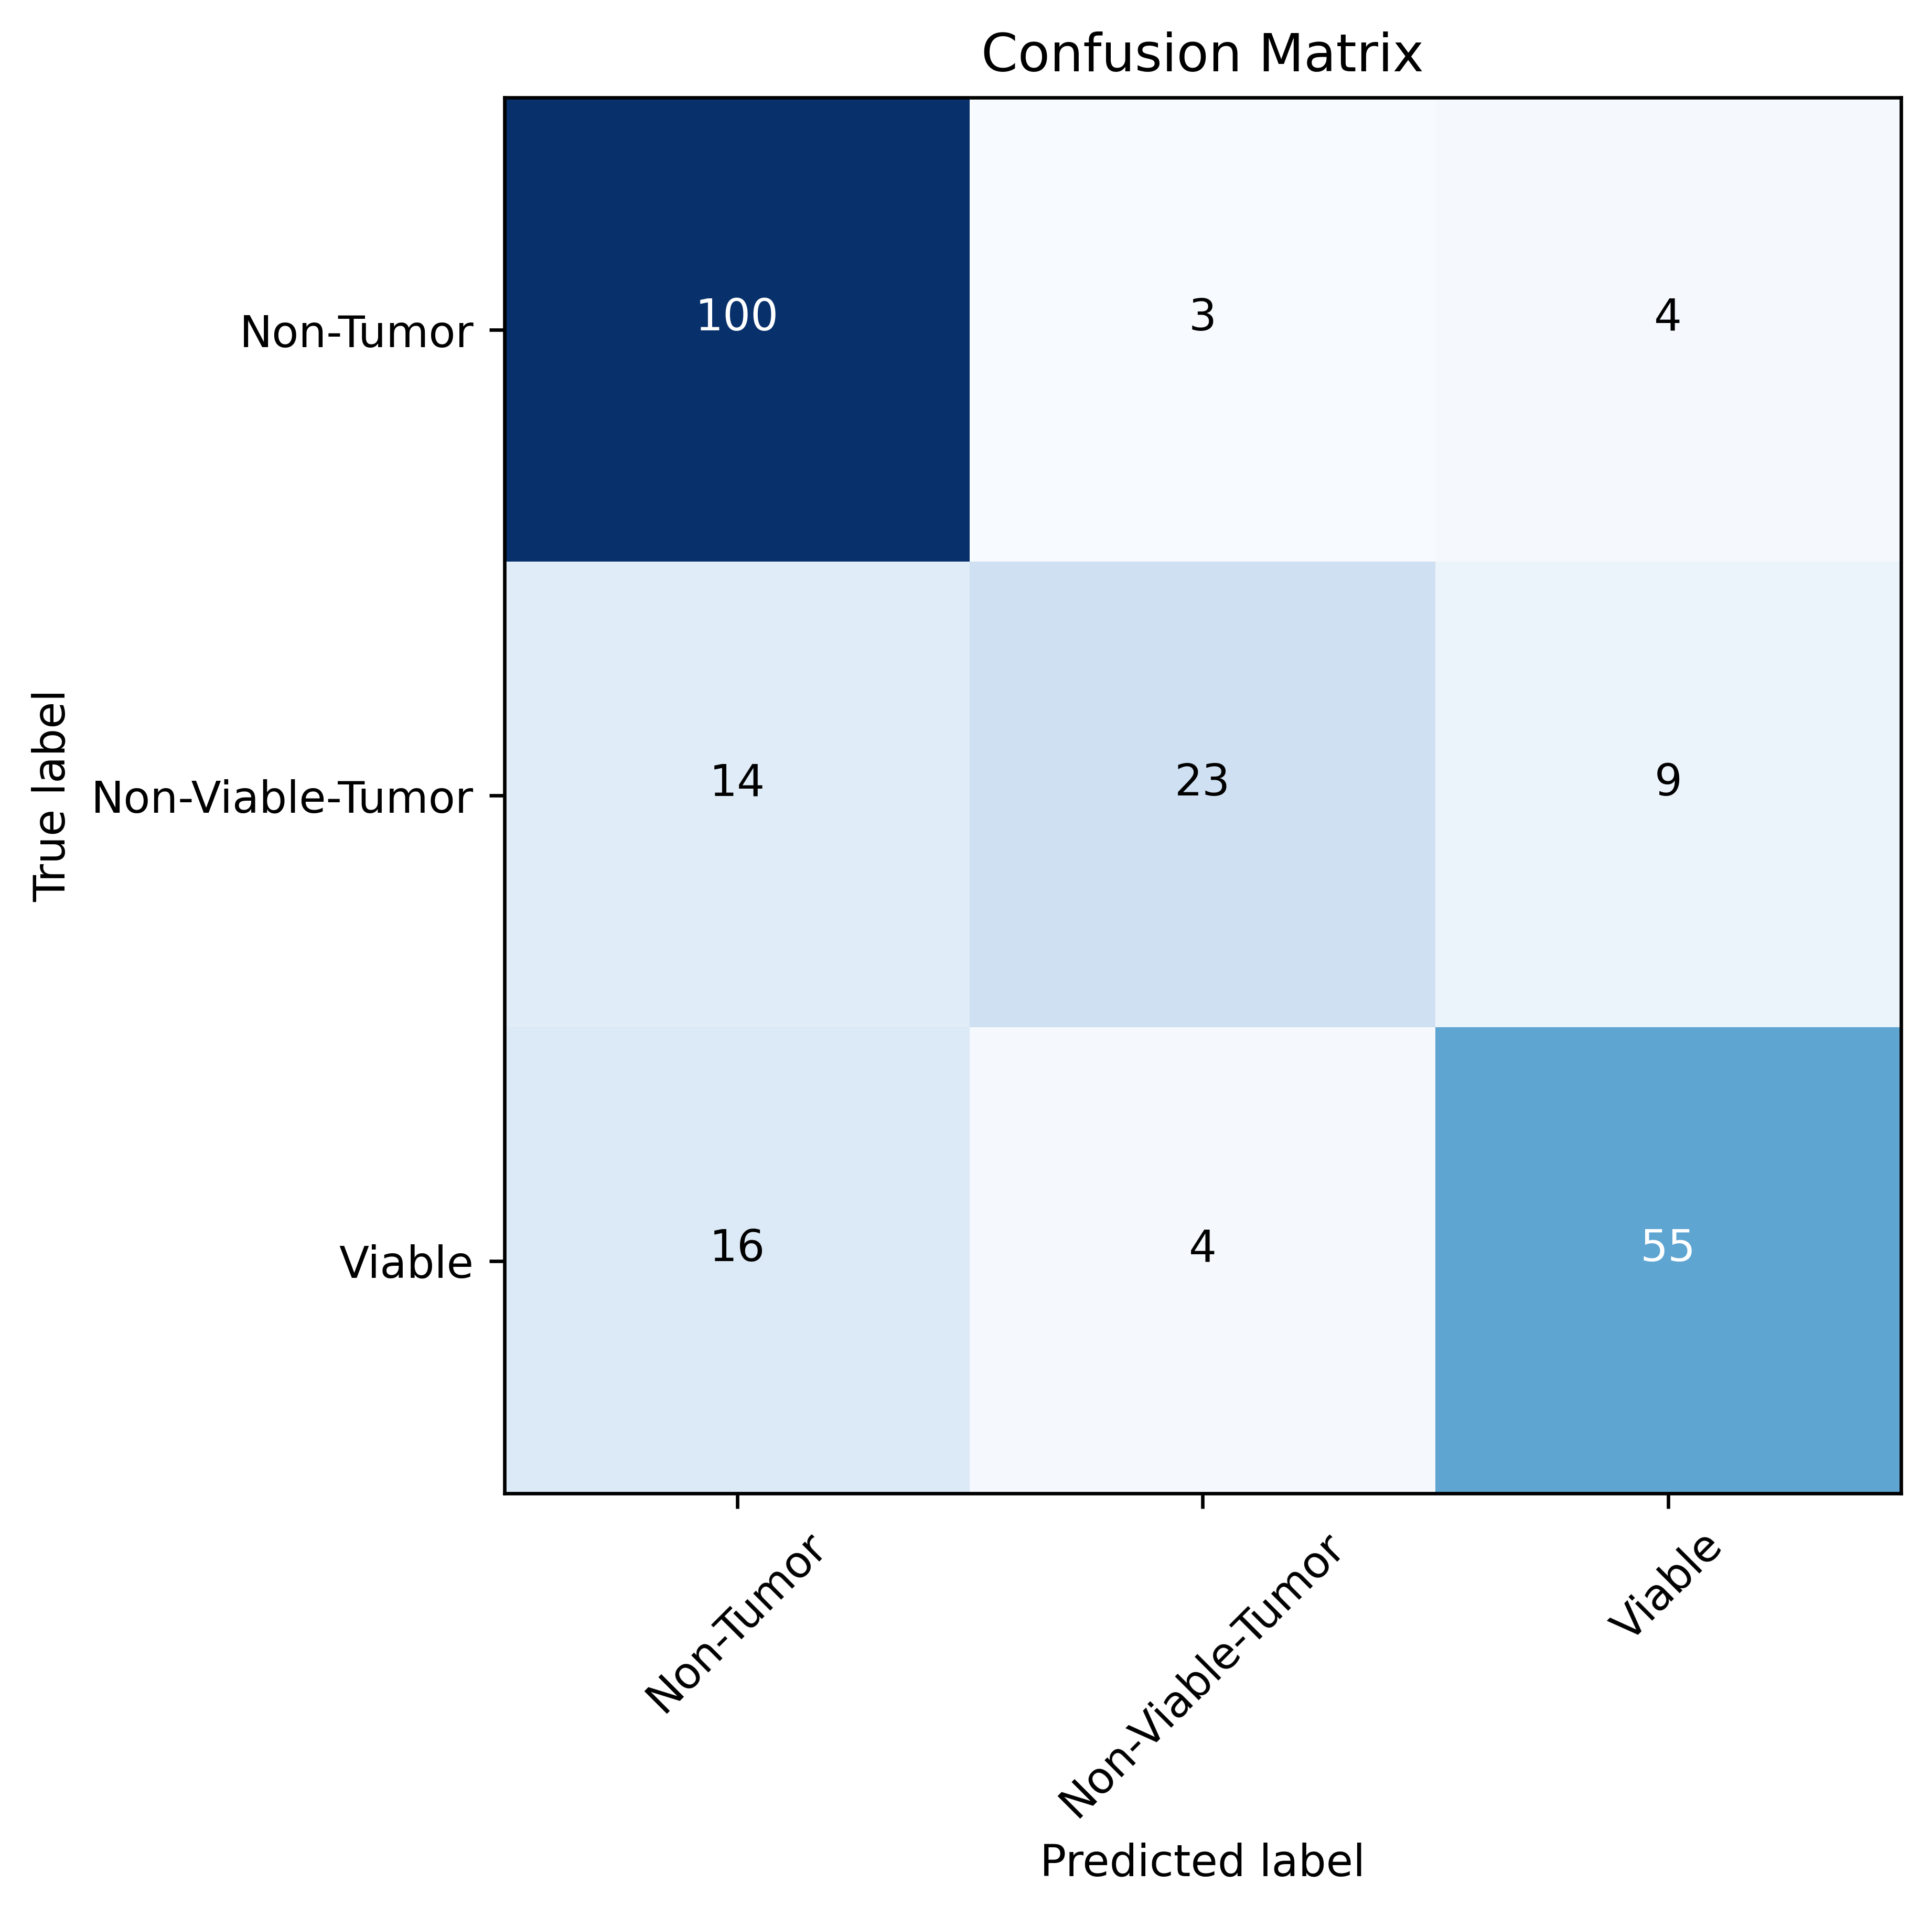

In [ ]:
# getting confusion matrix 
conf_matrix = confusion_matrix(y_test, rf_pred)

# plotting confusion matrix without normalization
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

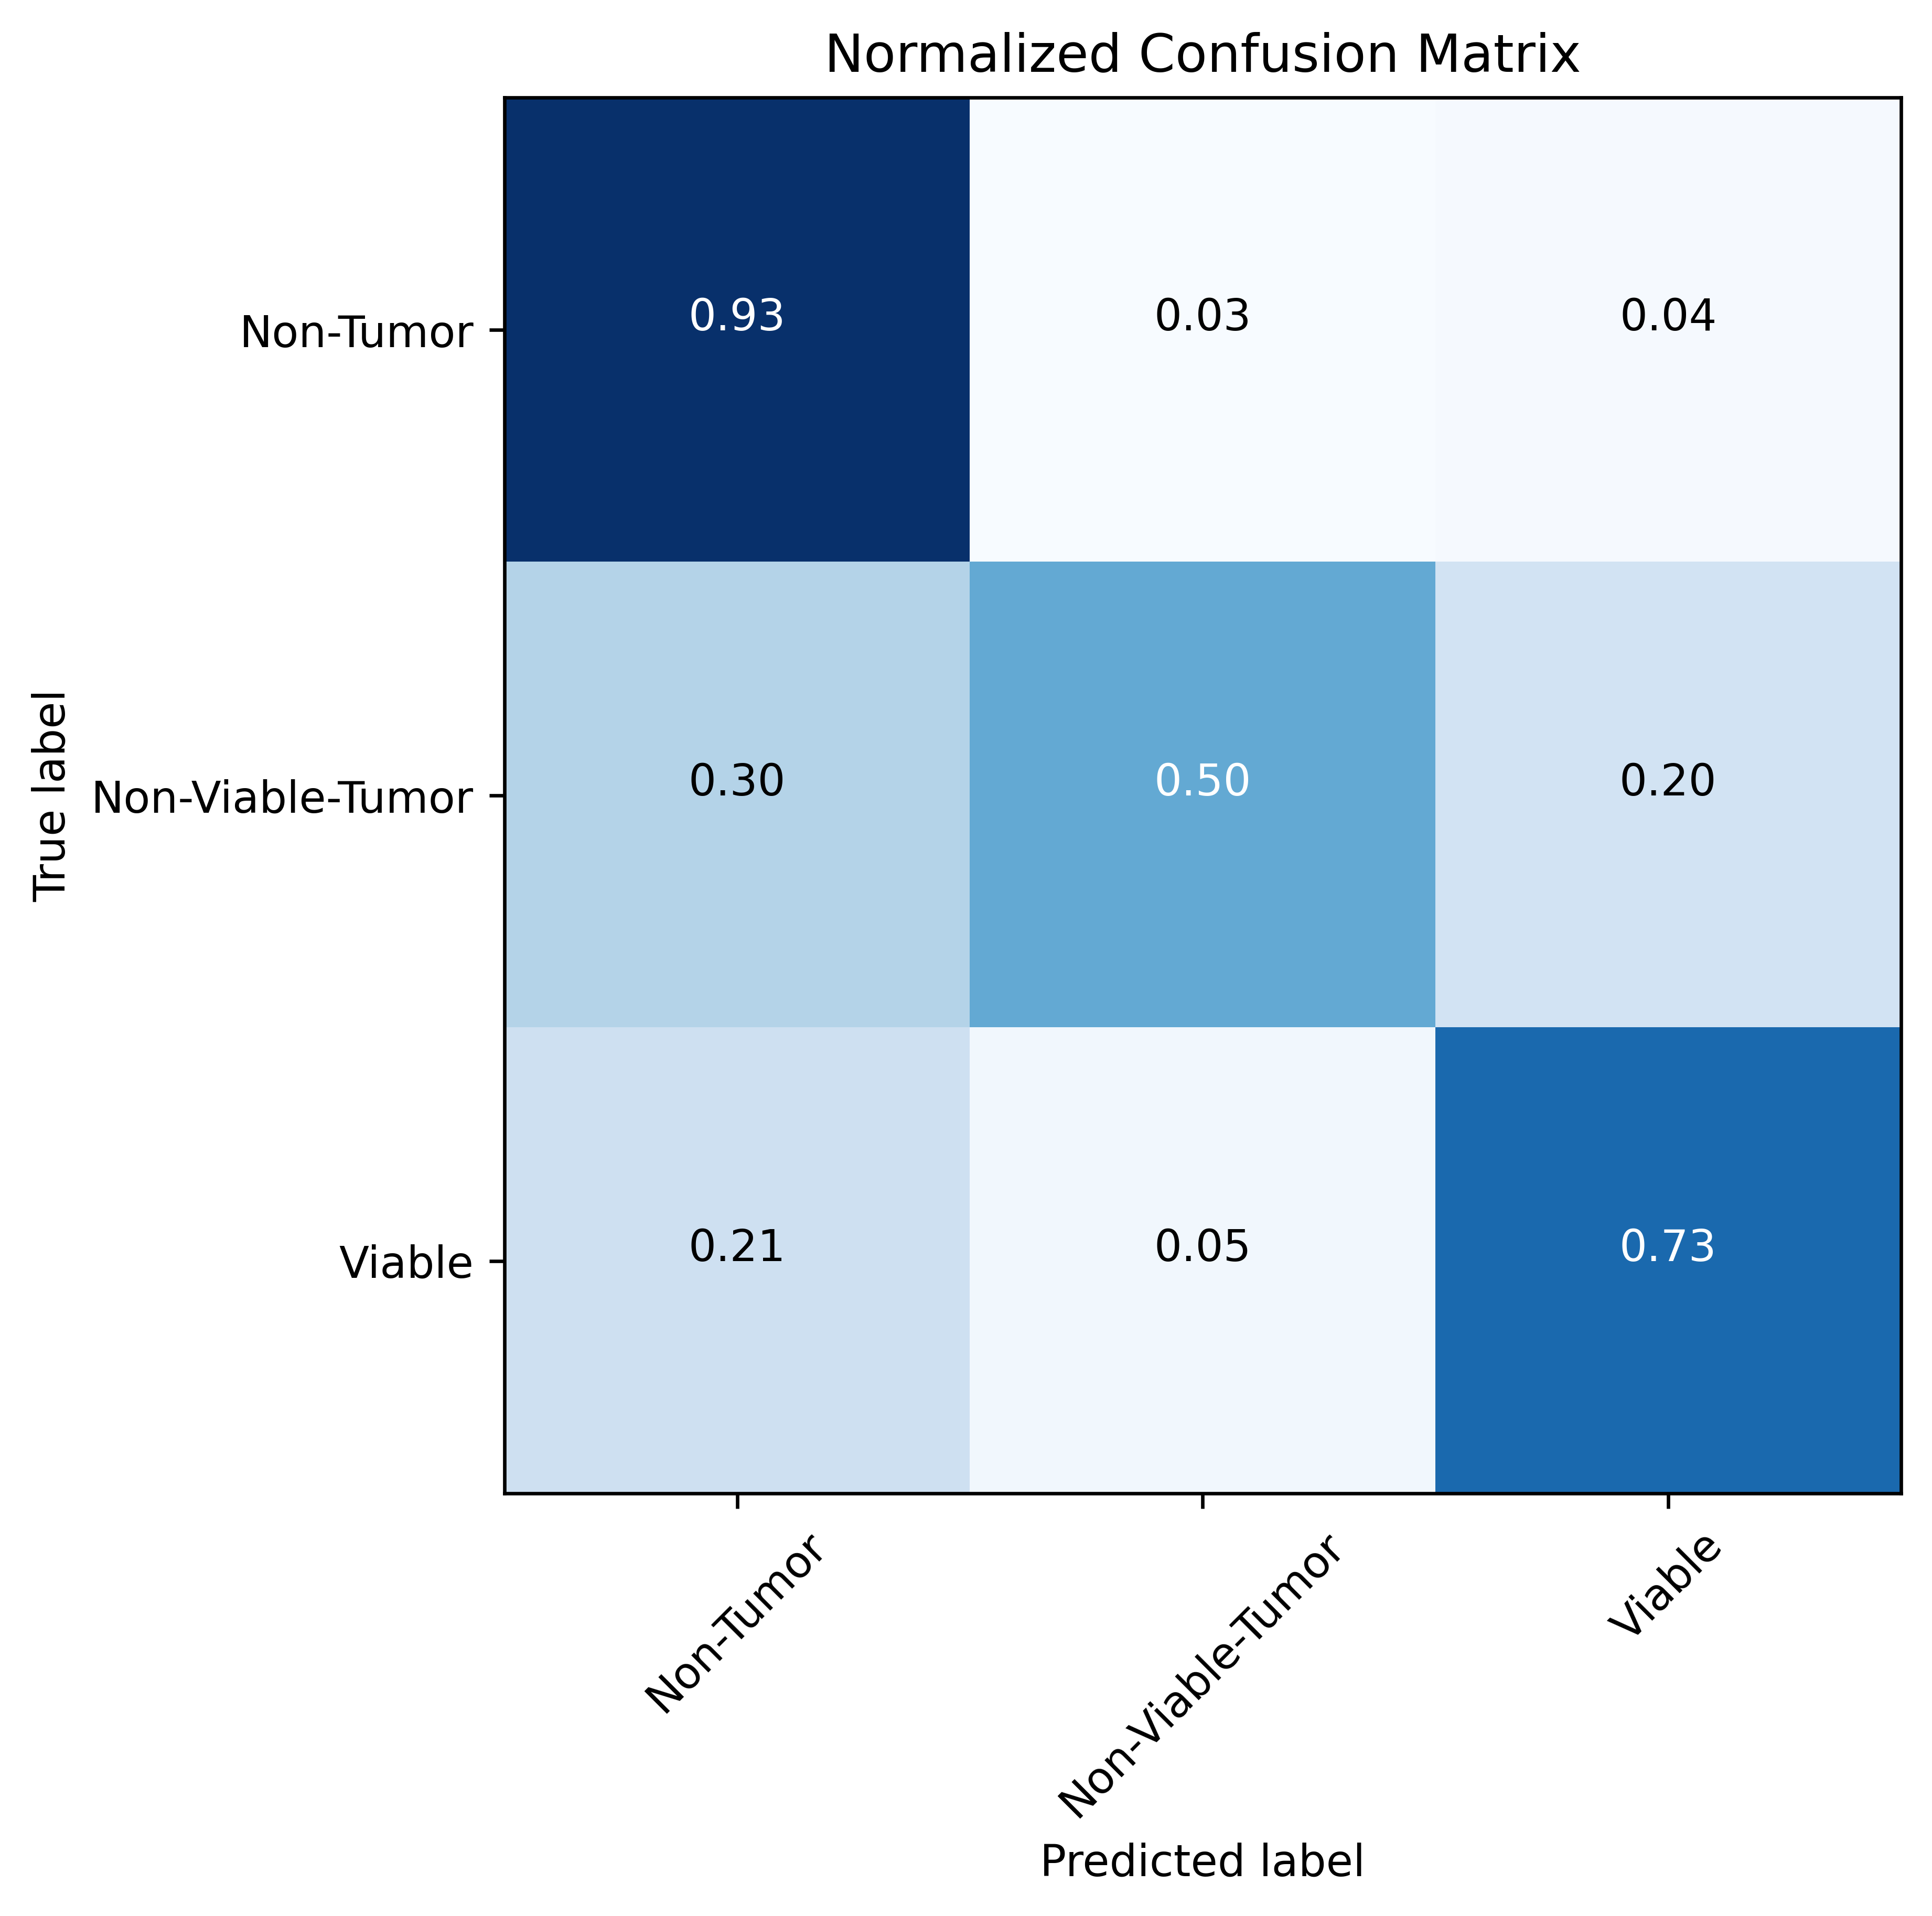

In [ ]:
# plotting confusion matrix with normalization
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**classification report**

In [ ]:
# getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       107
           1       0.77      0.50      0.61        46
           2       0.81      0.73      0.77        75

    accuracy                           0.78       228
   macro avg       0.78      0.72      0.74       228
weighted avg       0.78      0.78      0.77       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
# function to measure TP, FP, TN, FN

def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, rf_pred)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor        0.769     	      0.833      	   0.722   
  1   Non-Viable-Tumor     0.767     	      0.348      	   0.957   
  2        Viable          0.809      	      0.598      	   0.904   


# XGBOOST

In [ ]:
#XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier(learning_rate= 0.08)
model.fit(x_train_features, y_train) #For sklearn no one hot encoding

XGBClassifier(learning_rate=0.08, objective='multi:softprob')

In [ ]:
#Now predict using the trained RF model. 
prediction = model.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, prediction)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.803


**ROC AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

# clf = xgb.XGBClassifier().fit(x_train_features, y_train)
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.937


**Matthews Correlation Coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, prediction)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.684


**Confusion Matrix**

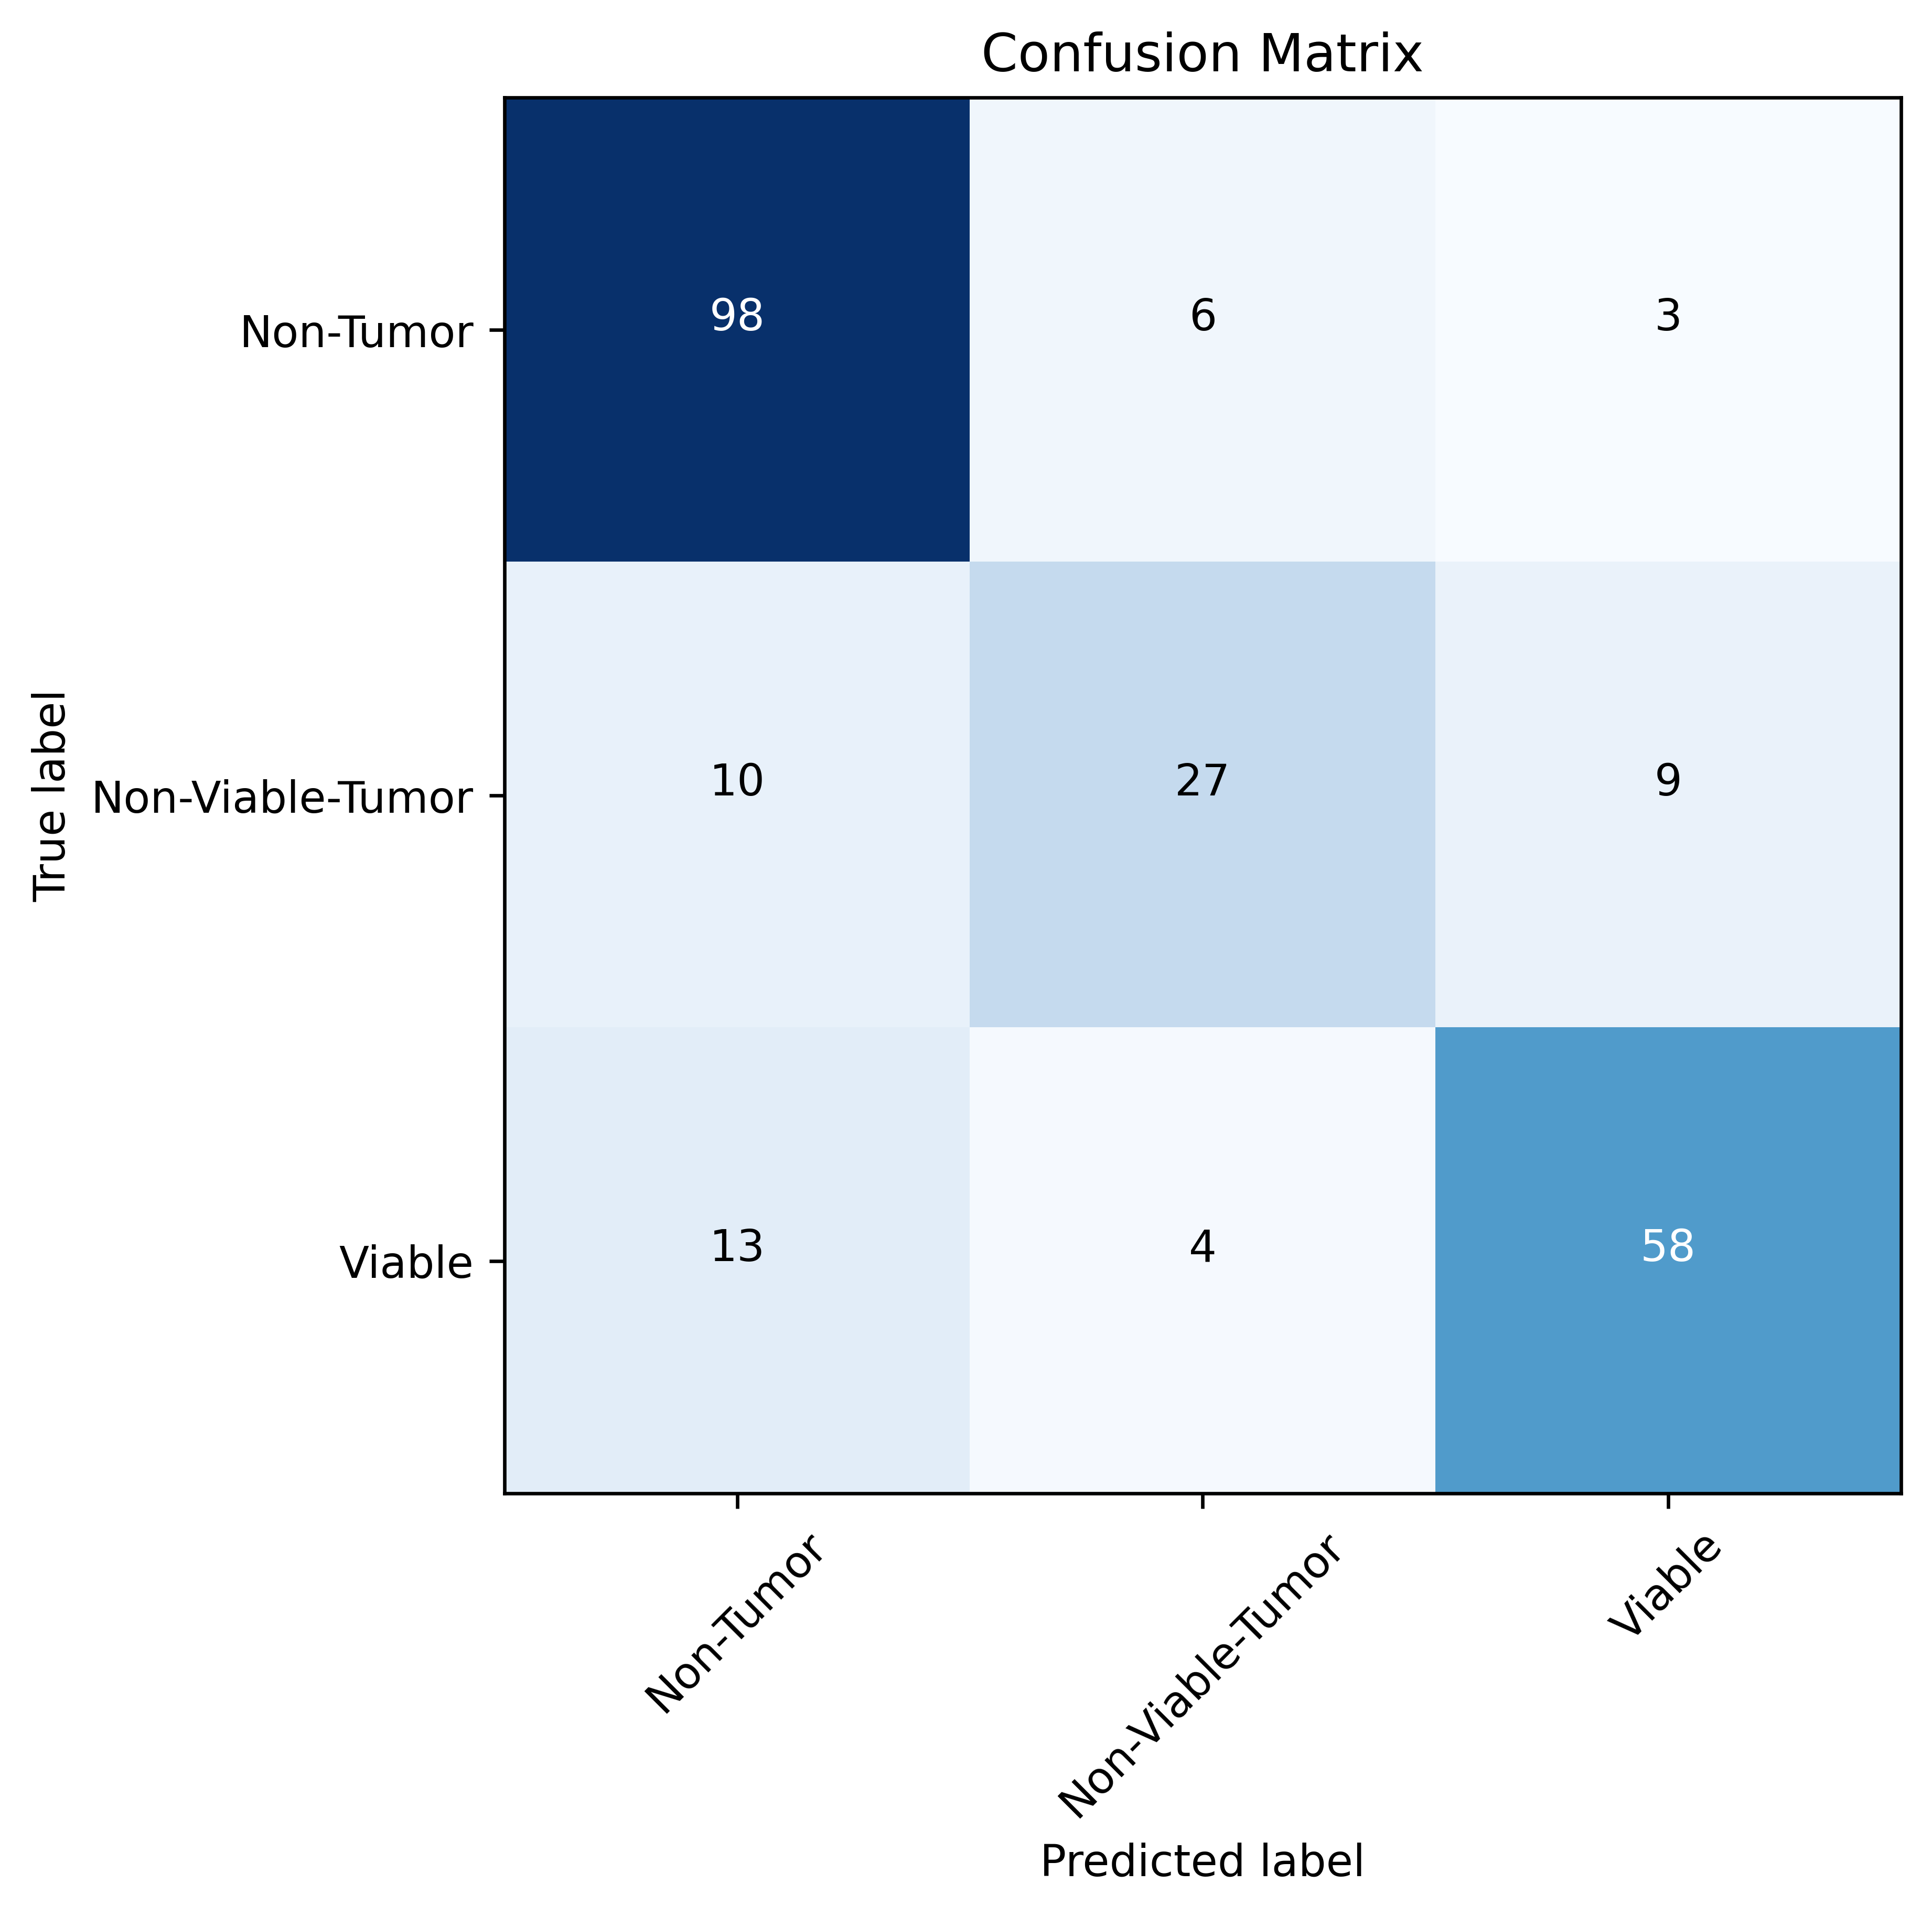

In [ ]:
# getting confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)

# plotting confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

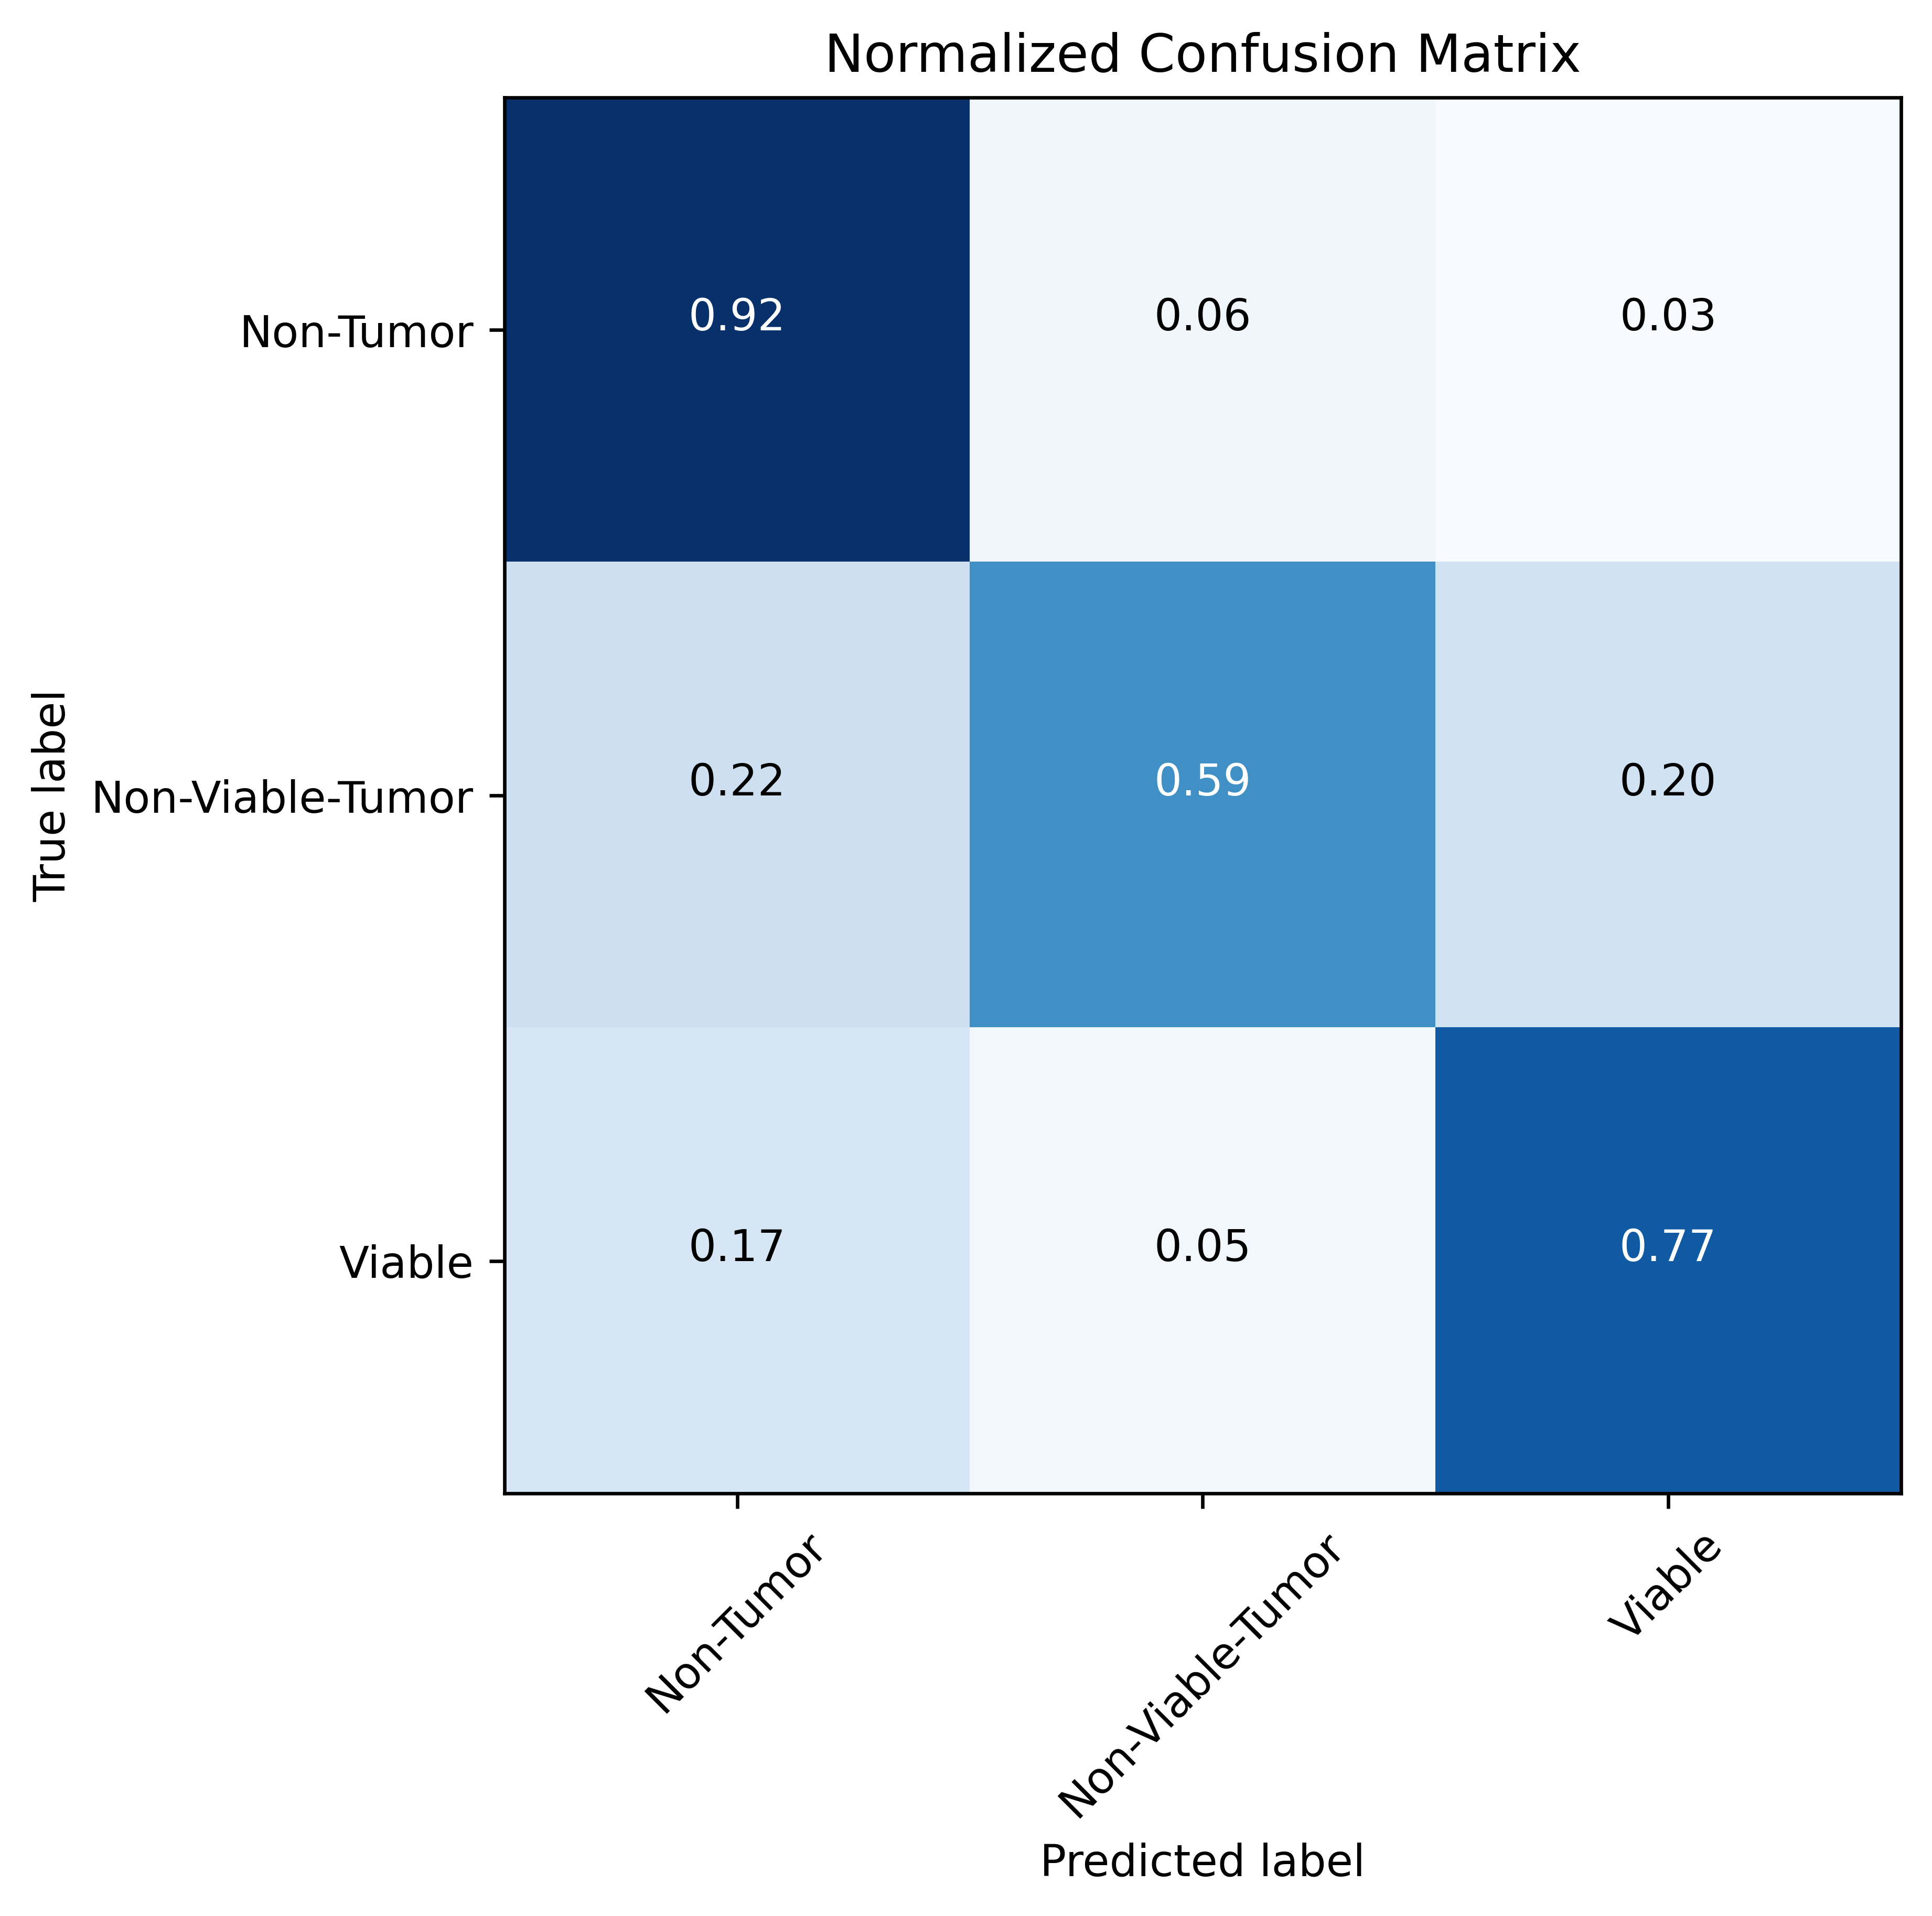

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**Classification Report**

In [ ]:
# classification report using scikit learn 
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.59      0.65        46
           2       0.83      0.77      0.80        75

    accuracy                           0.80       228
   macro avg       0.79      0.76      0.77       228
weighted avg       0.80      0.80      0.80       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, prediction)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor         0.81     	      0.817      	   0.787   
  1   Non-Viable-Tumor      0.73     	      0.435      	    0.94   
  2        Viable          0.829      	      0.637      	   0.912   


# Light Gradient Boosting (LGBM)

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# fit the model on the whole dataset
lgbm_model = LGBMClassifier()

# fit our training data into lgbm classifier
lgbm_model.fit(x_train_features, y_train)

LGBMClassifier()

In [ ]:
# predicting test features using LGBM classifier
lgbm_pred = lgbm_model.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, lgbm_pred)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.803


**ROC-AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, lgbm_model.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.934


**Matthews Correlation Coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, lgbm_pred)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.685


**confusion matrix**

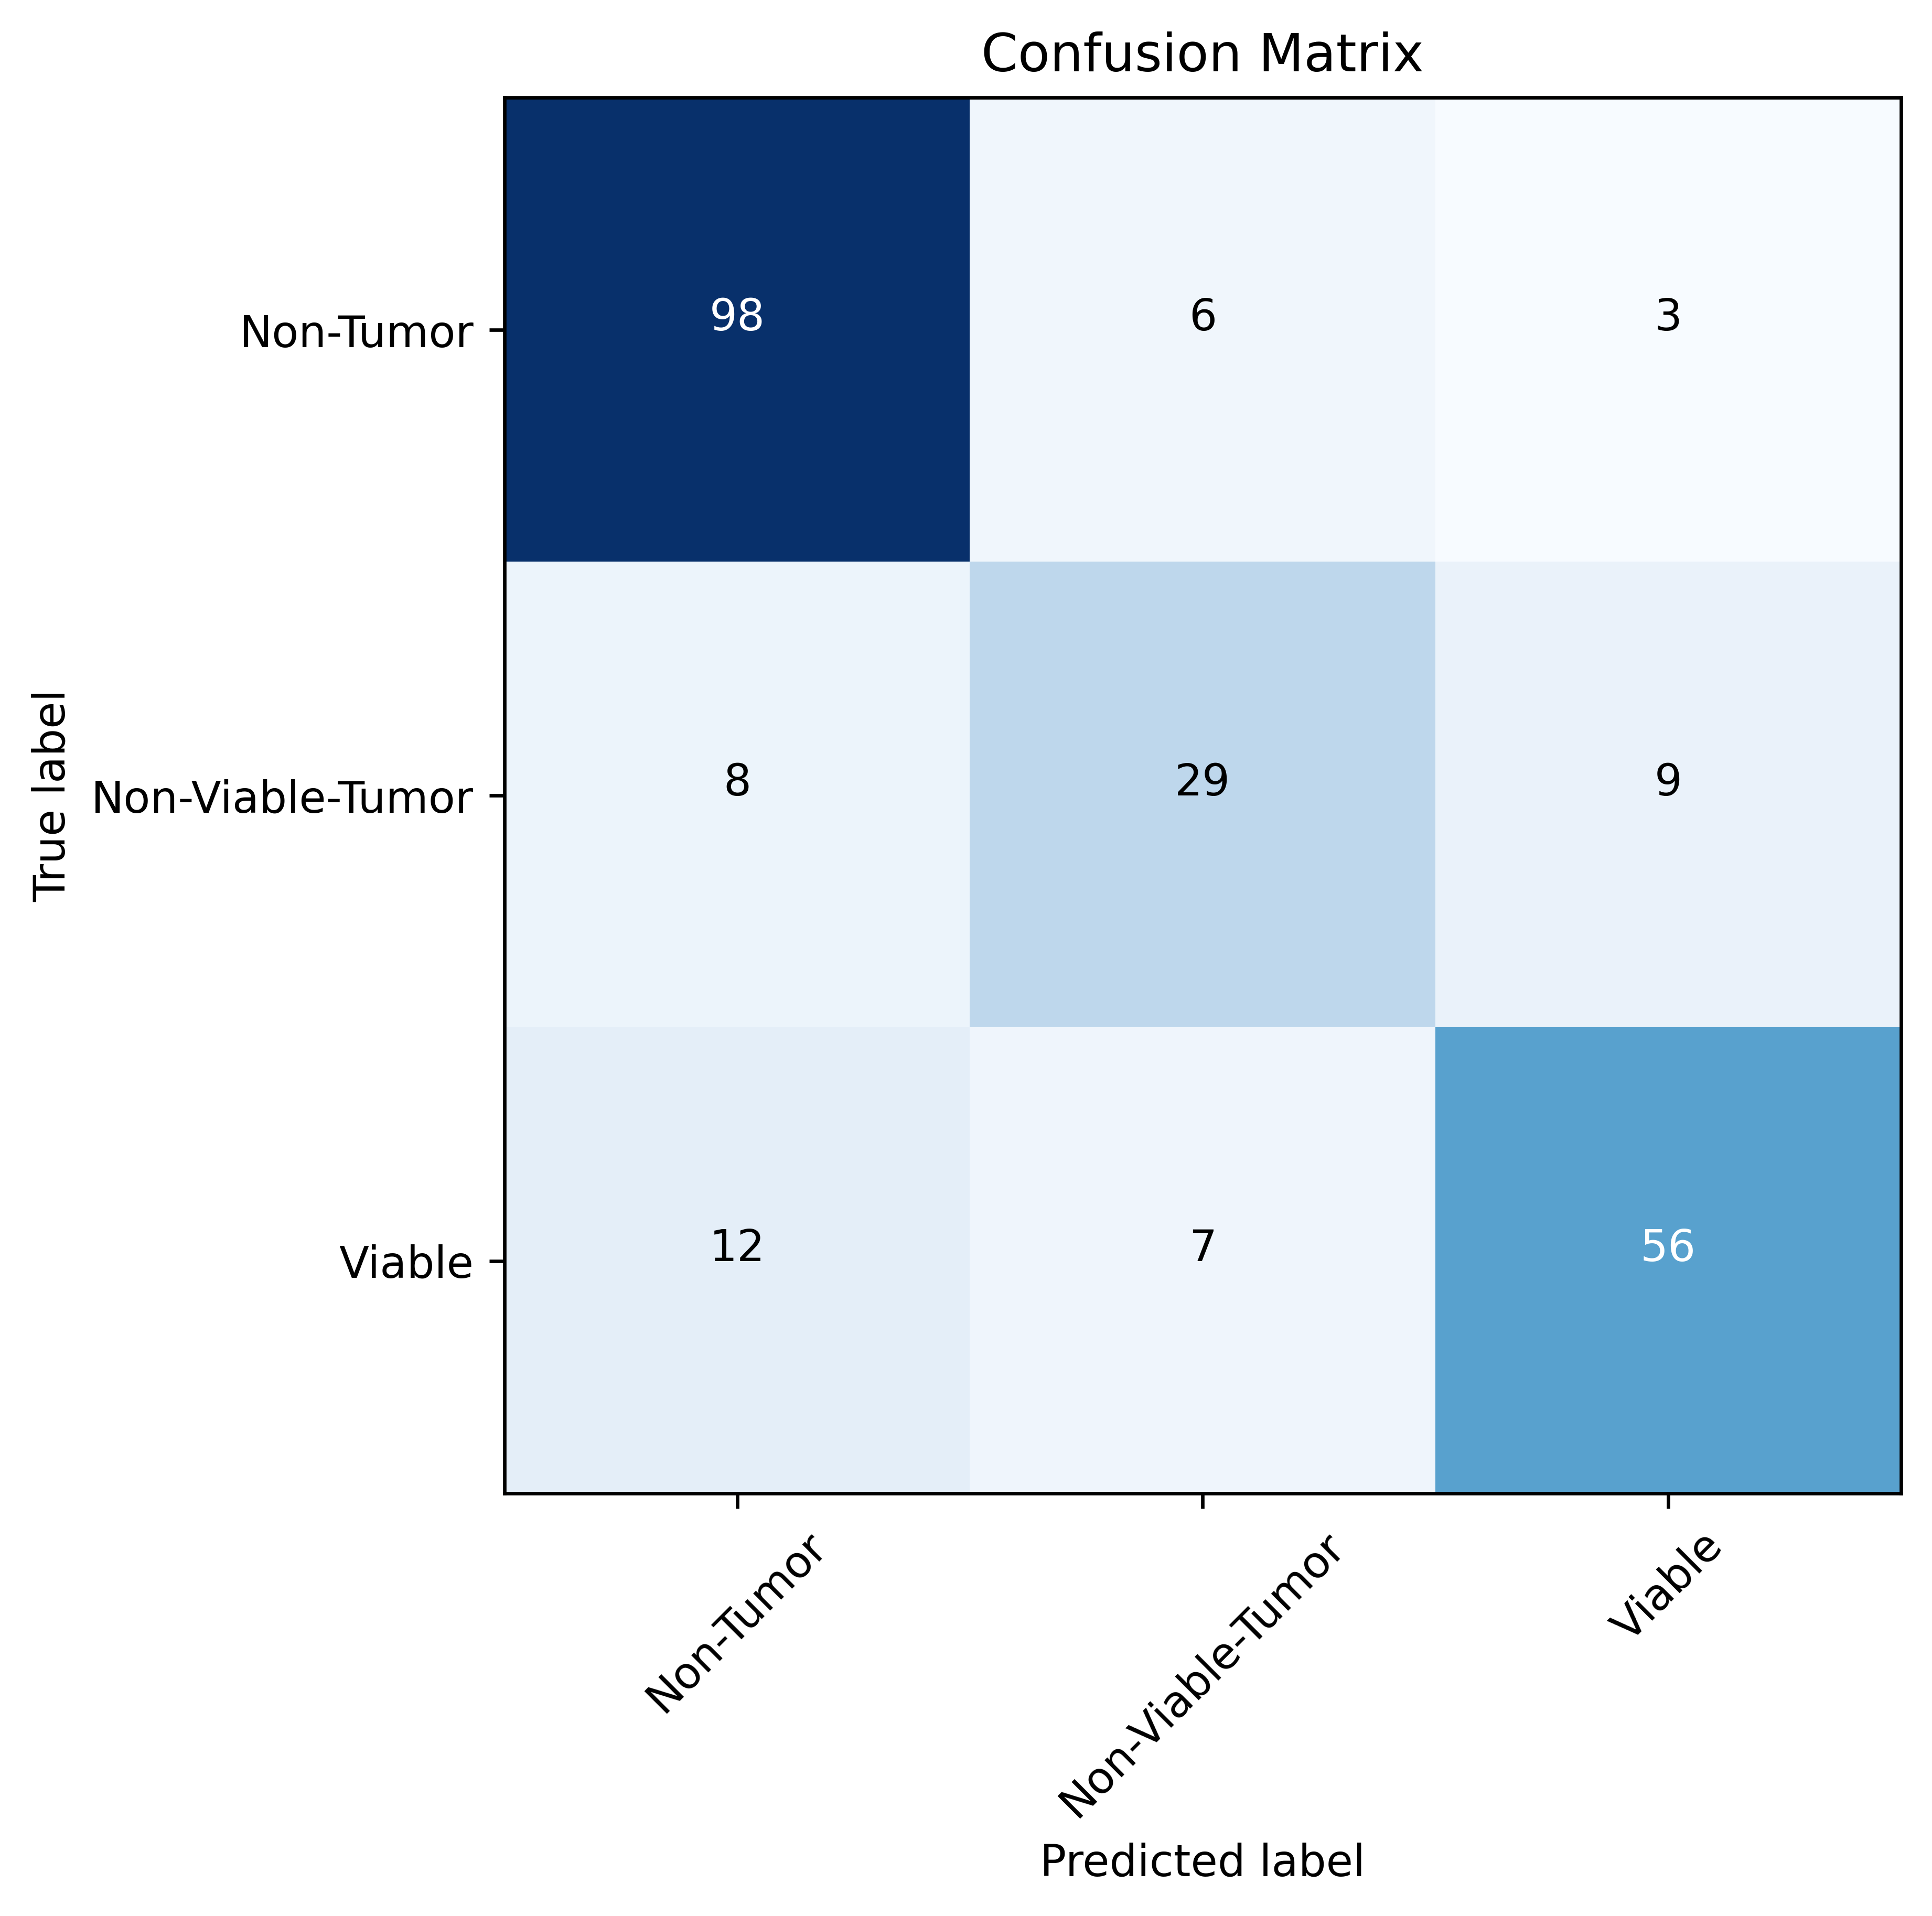

In [ ]:
# getting confusion matrix
conf_matrix = confusion_matrix(y_test, lgbm_pred)

# plotting confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

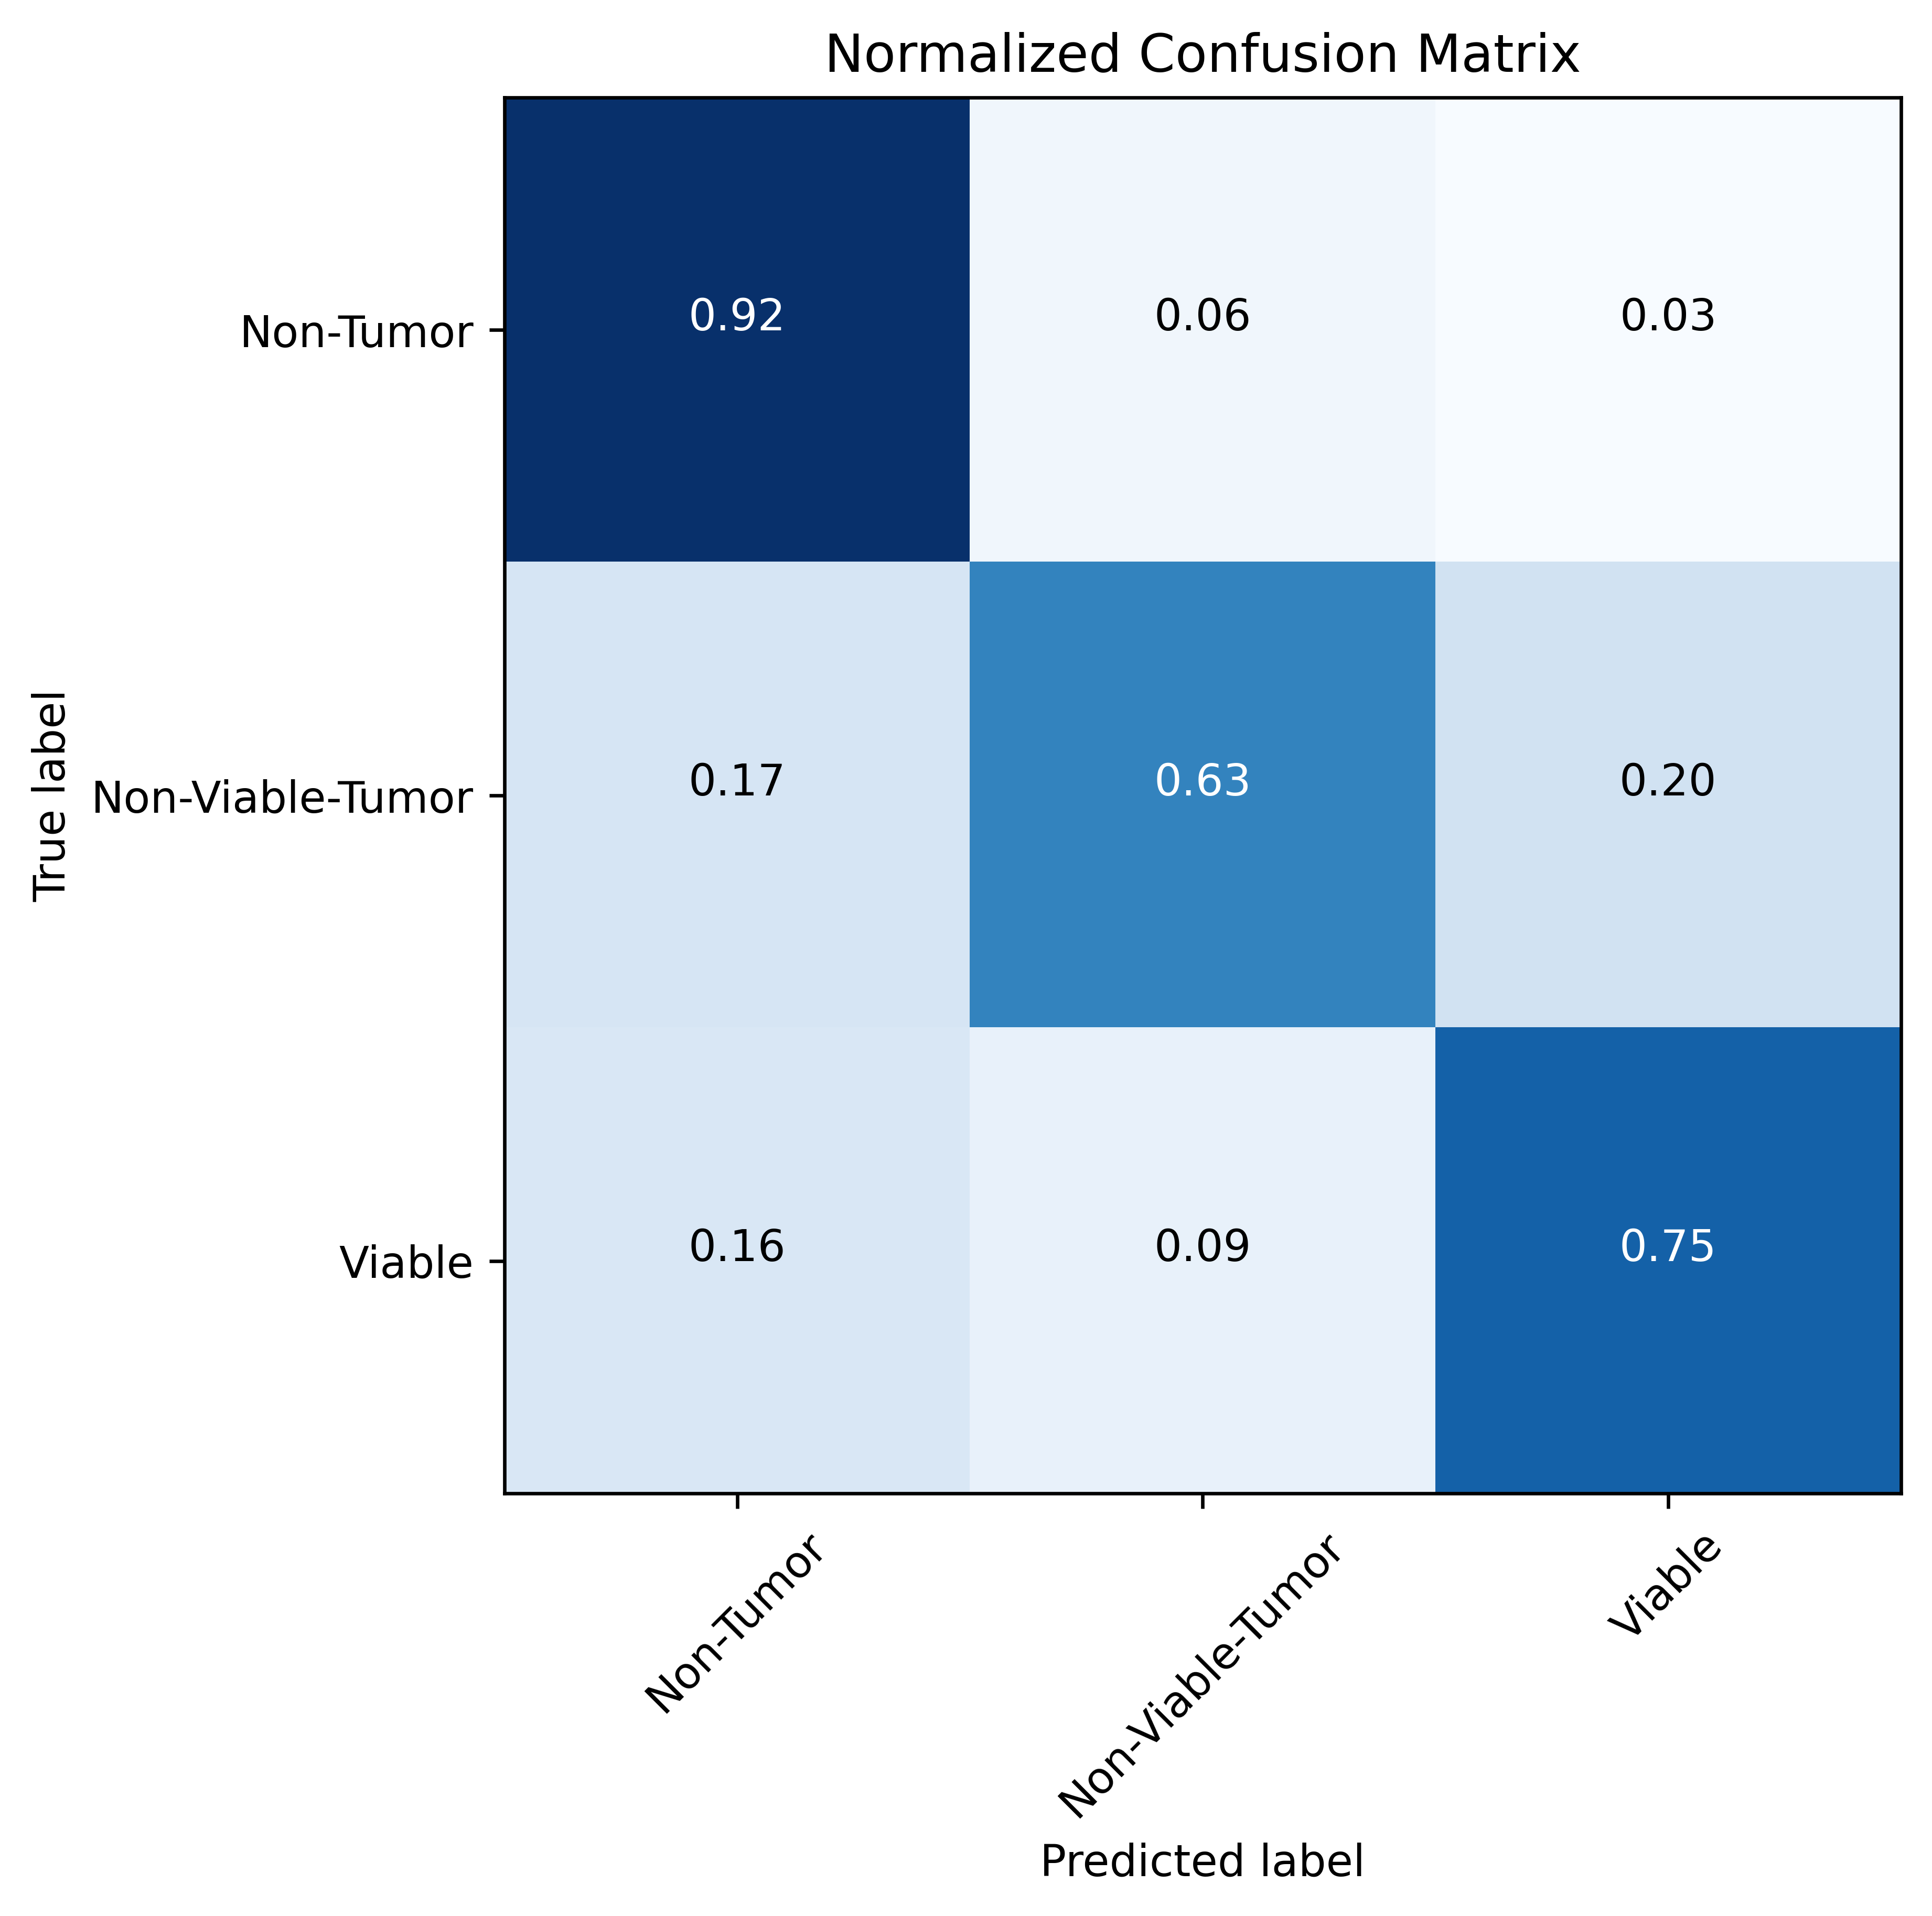

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**classsification report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       107
           1       0.69      0.63      0.66        46
           2       0.82      0.75      0.78        75

    accuracy                           0.80       228
   macro avg       0.78      0.76      0.77       228
weighted avg       0.80      0.80      0.80       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, lgbm_pred)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor        0.831     	      0.797      	    0.81   
  1   Non-Viable-Tumor      0.69     	      0.475      	   0.922   
  2        Viable          0.824      	      0.629      	   0.914   


# Decision Tree (DT)

In [ ]:
# importing SVM module
from sklearn.svm import SVC

In [ ]:
# kernel to be set radial bf 
# svm_classifier = SVC(kernel='linear', probability= True)
svm_classifier = DecisionTreeClassifier(max_depth =7,ccp_alpha=0.015,  random_state = 42)
# fit our training data into svm classifier
svm_classifier.fit(x_train_features, y_train)

DecisionTreeClassifier(ccp_alpha=0.015, max_depth=7, random_state=42)

In [ ]:
# predicting test data 
svm_pred = svm_classifier.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, svm_pred)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.636


**ROC AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

# svm_c = SVC(kernel='linear', probability= True).fit(x_train_features, y_train)

roc_auc = roc_auc_score(y_test, svm_classifier.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.753


**Matthews Correlation Coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, svm_pred)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.418


**Confusion Matrix**

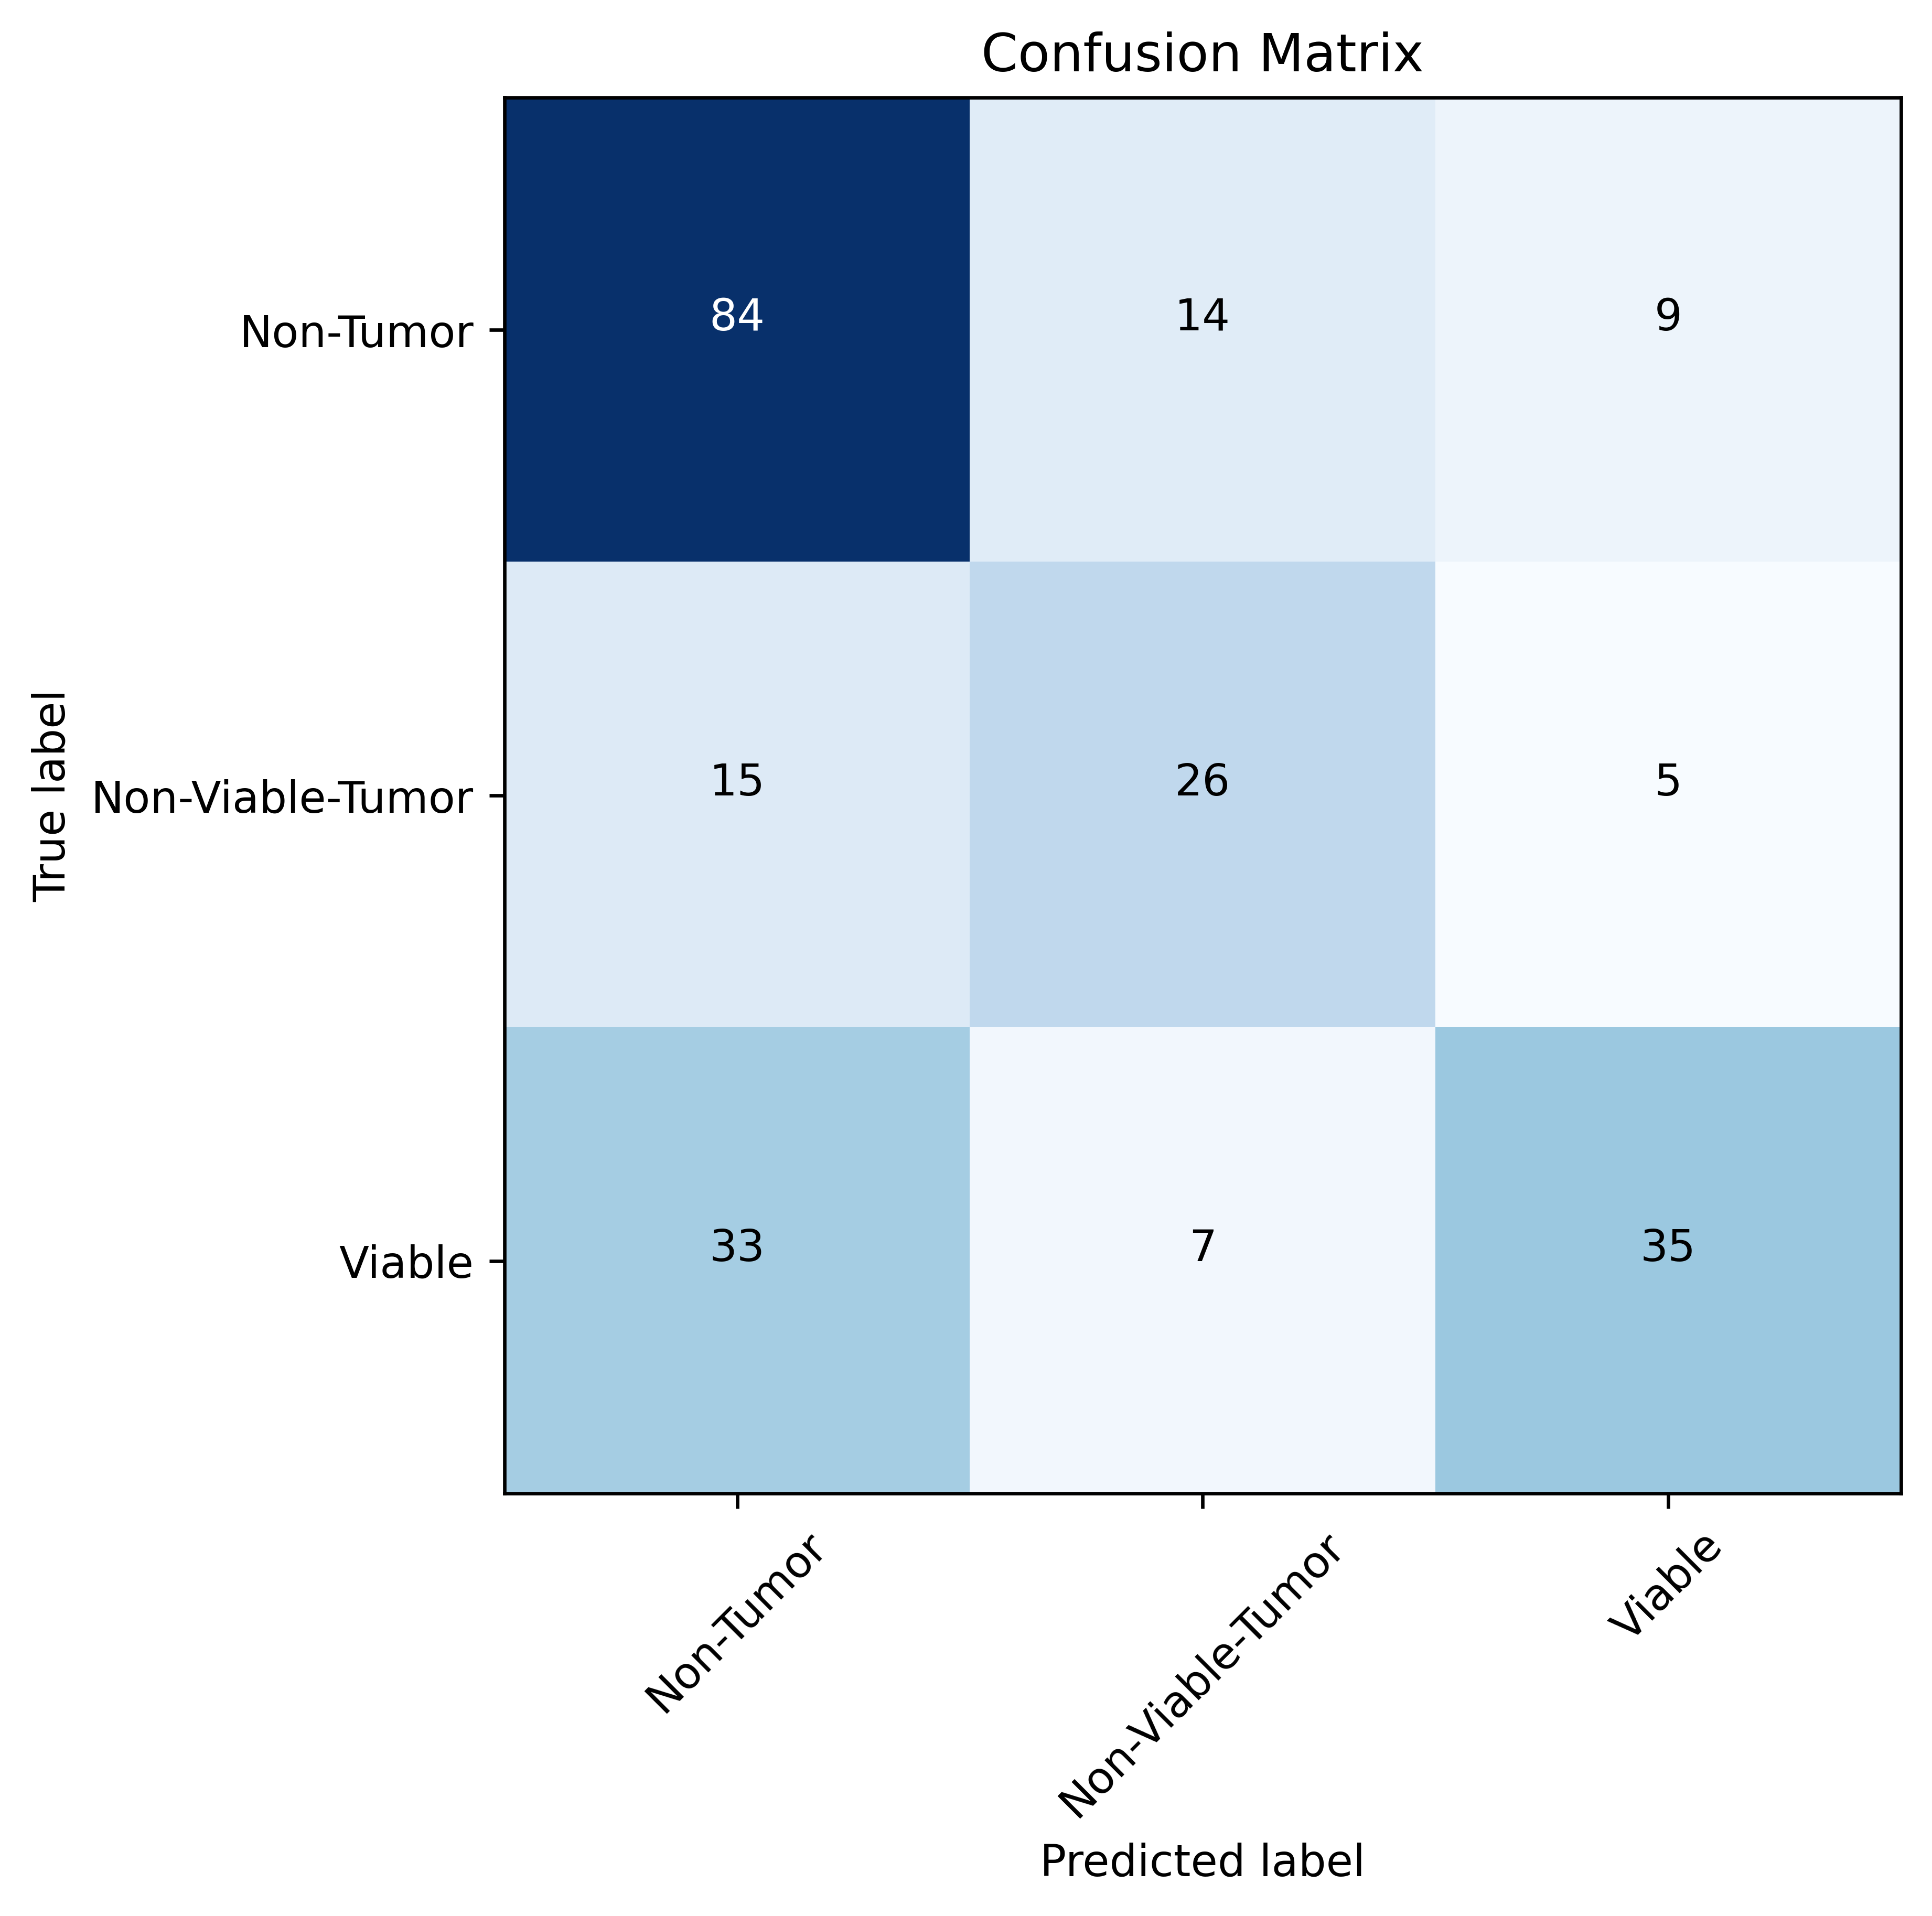

In [ ]:
# getting confusion matrix
conf_matrix = confusion_matrix(y_test, svm_pred)

# plotting confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

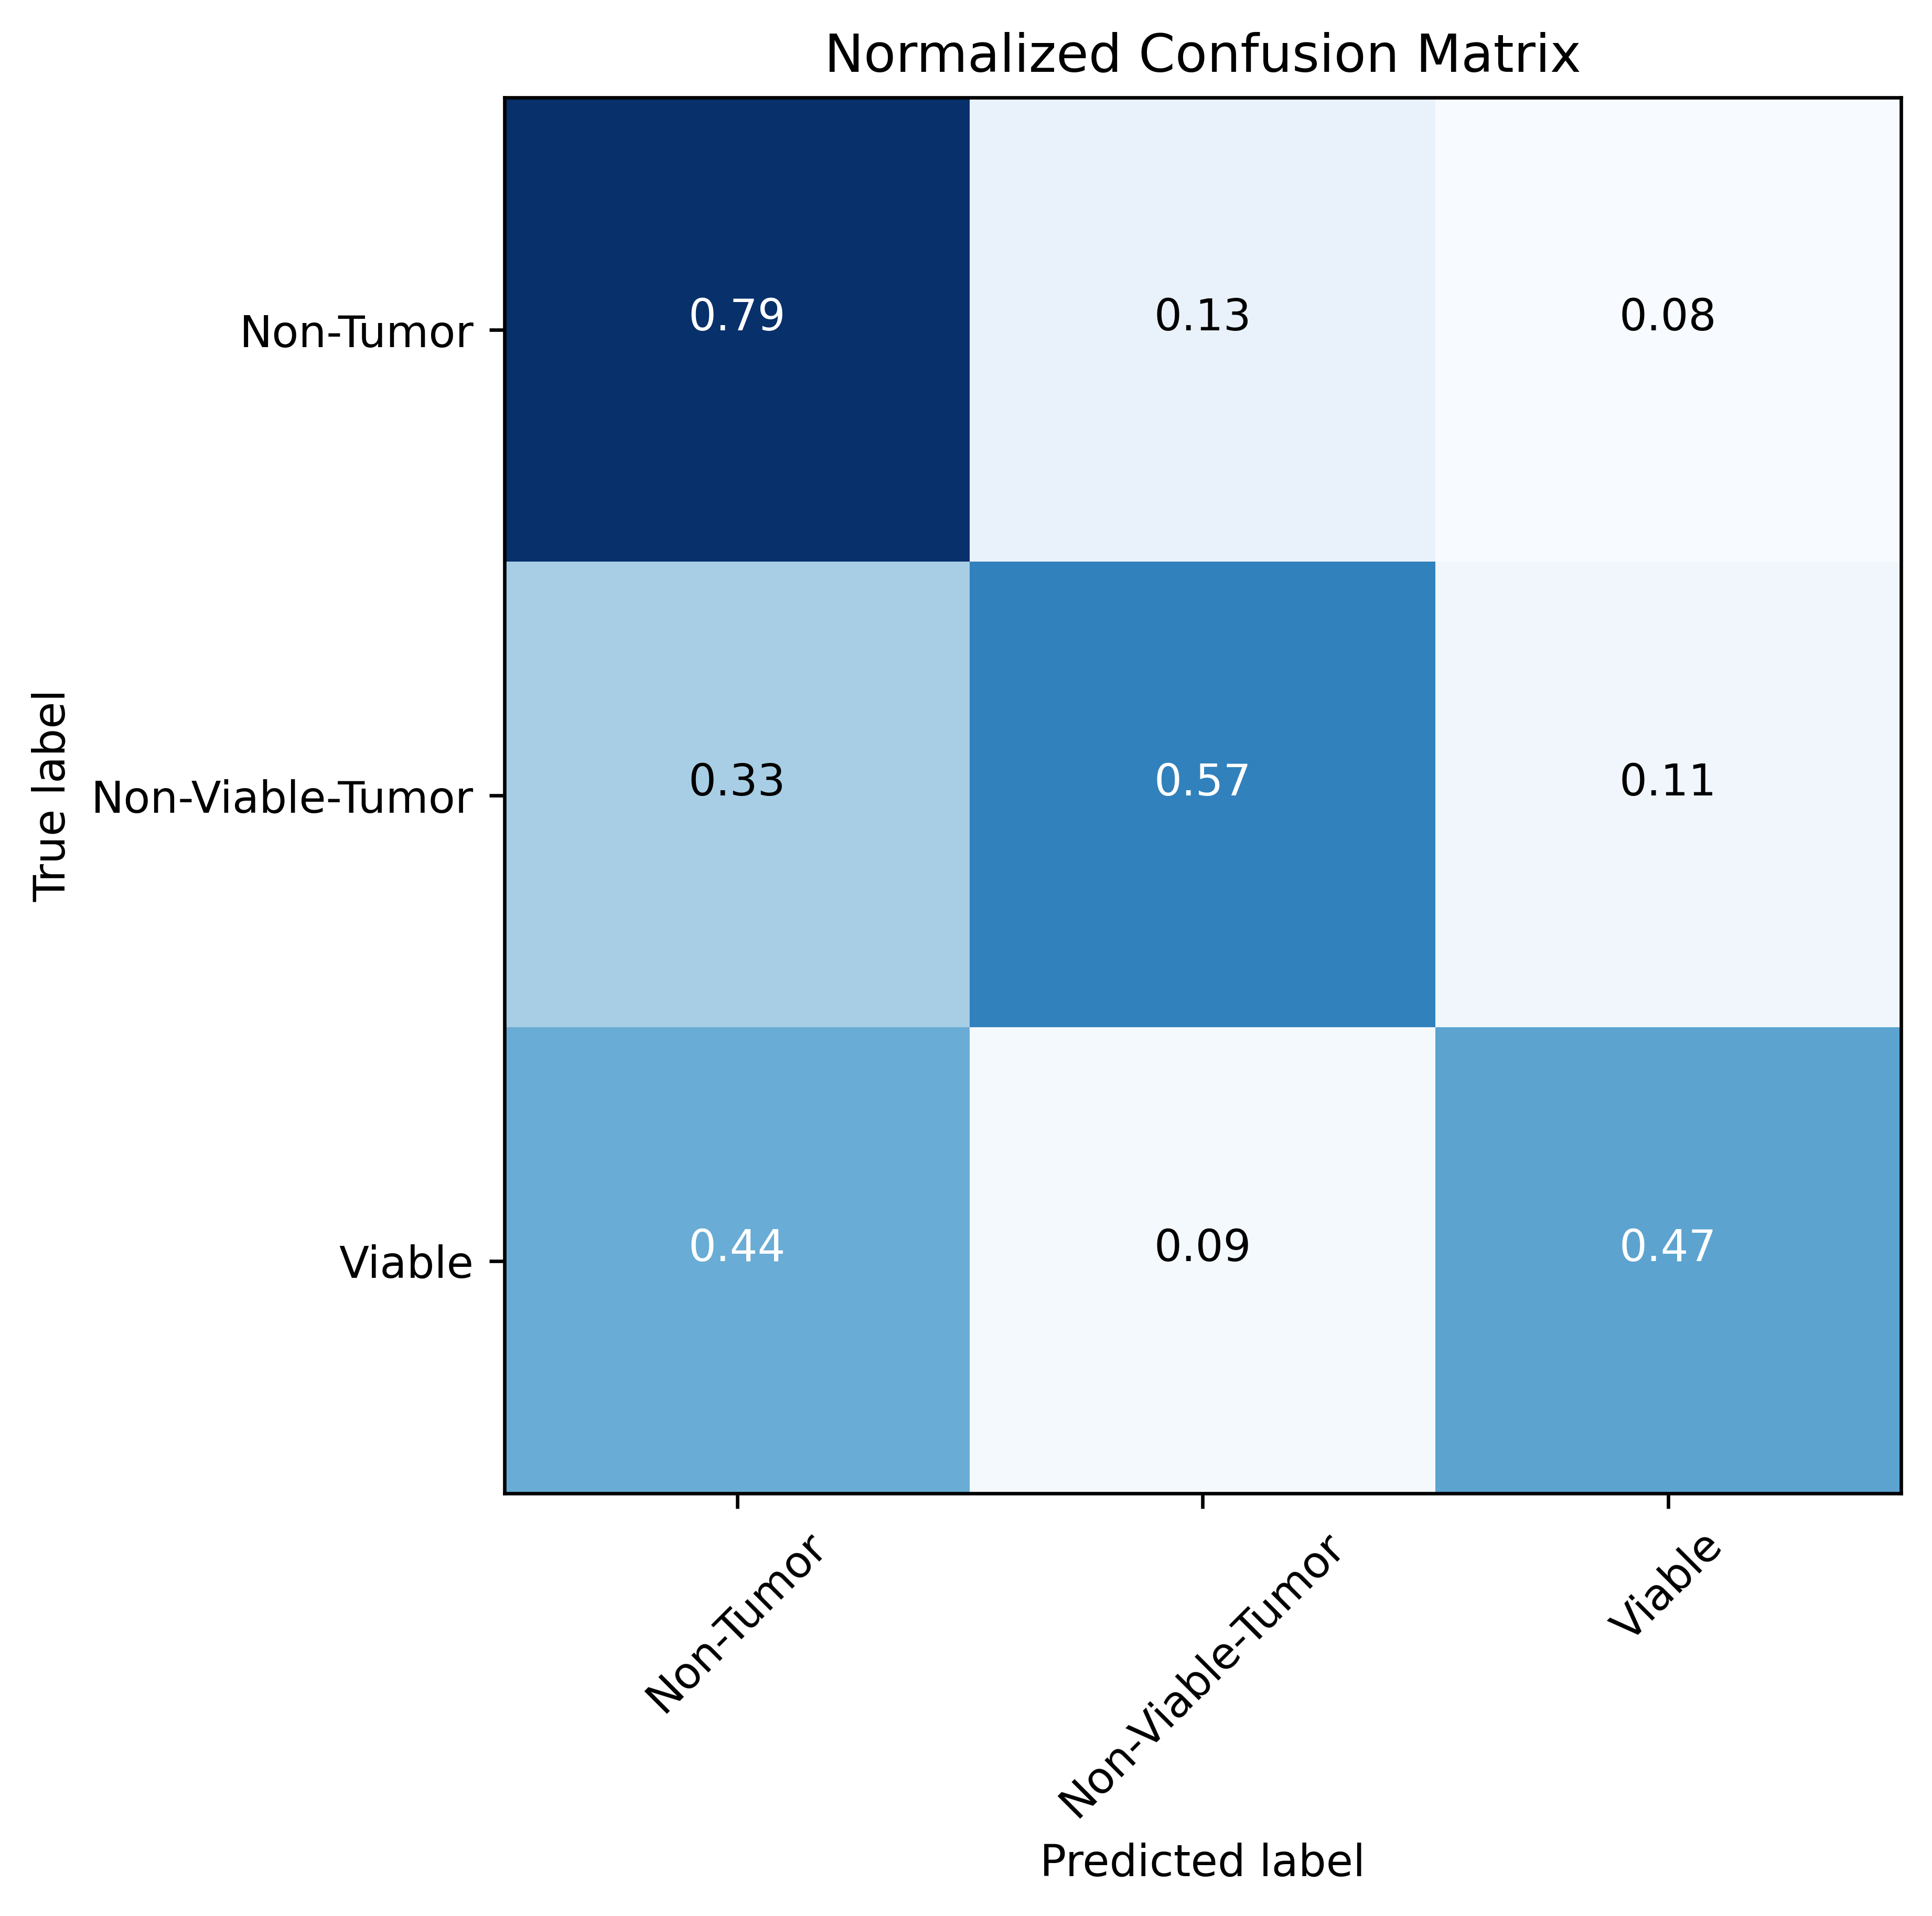

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.64      0.79      0.70       107
           1       0.55      0.57      0.56        46
           2       0.71      0.47      0.56        75

    accuracy                           0.64       228
   macro avg       0.63      0.61      0.61       228
weighted avg       0.65      0.64      0.63       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, svm_pred)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor        0.636     	      0.706      	    0.56   
  1   Non-Viable-Tumor     0.553     	      0.295      	    0.85   
  2        Viable          0.714      	      0.337      	   0.887   


# Multi Linear Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# defining MLP classifier
mlp_classifier = MLPClassifier(random_state=1, max_iter=200)

# fitting training data 
mlp_classifier.fit(x_train_features, y_train)

MLPClassifier(random_state=1)

In [ ]:
# predicting through test data
mlp_pred = mlp_classifier.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, mlp_pred)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.82


**ROC AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, mlp_classifier.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.932


**Matthews correlation coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, mlp_pred)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.713


**confusion matrix**

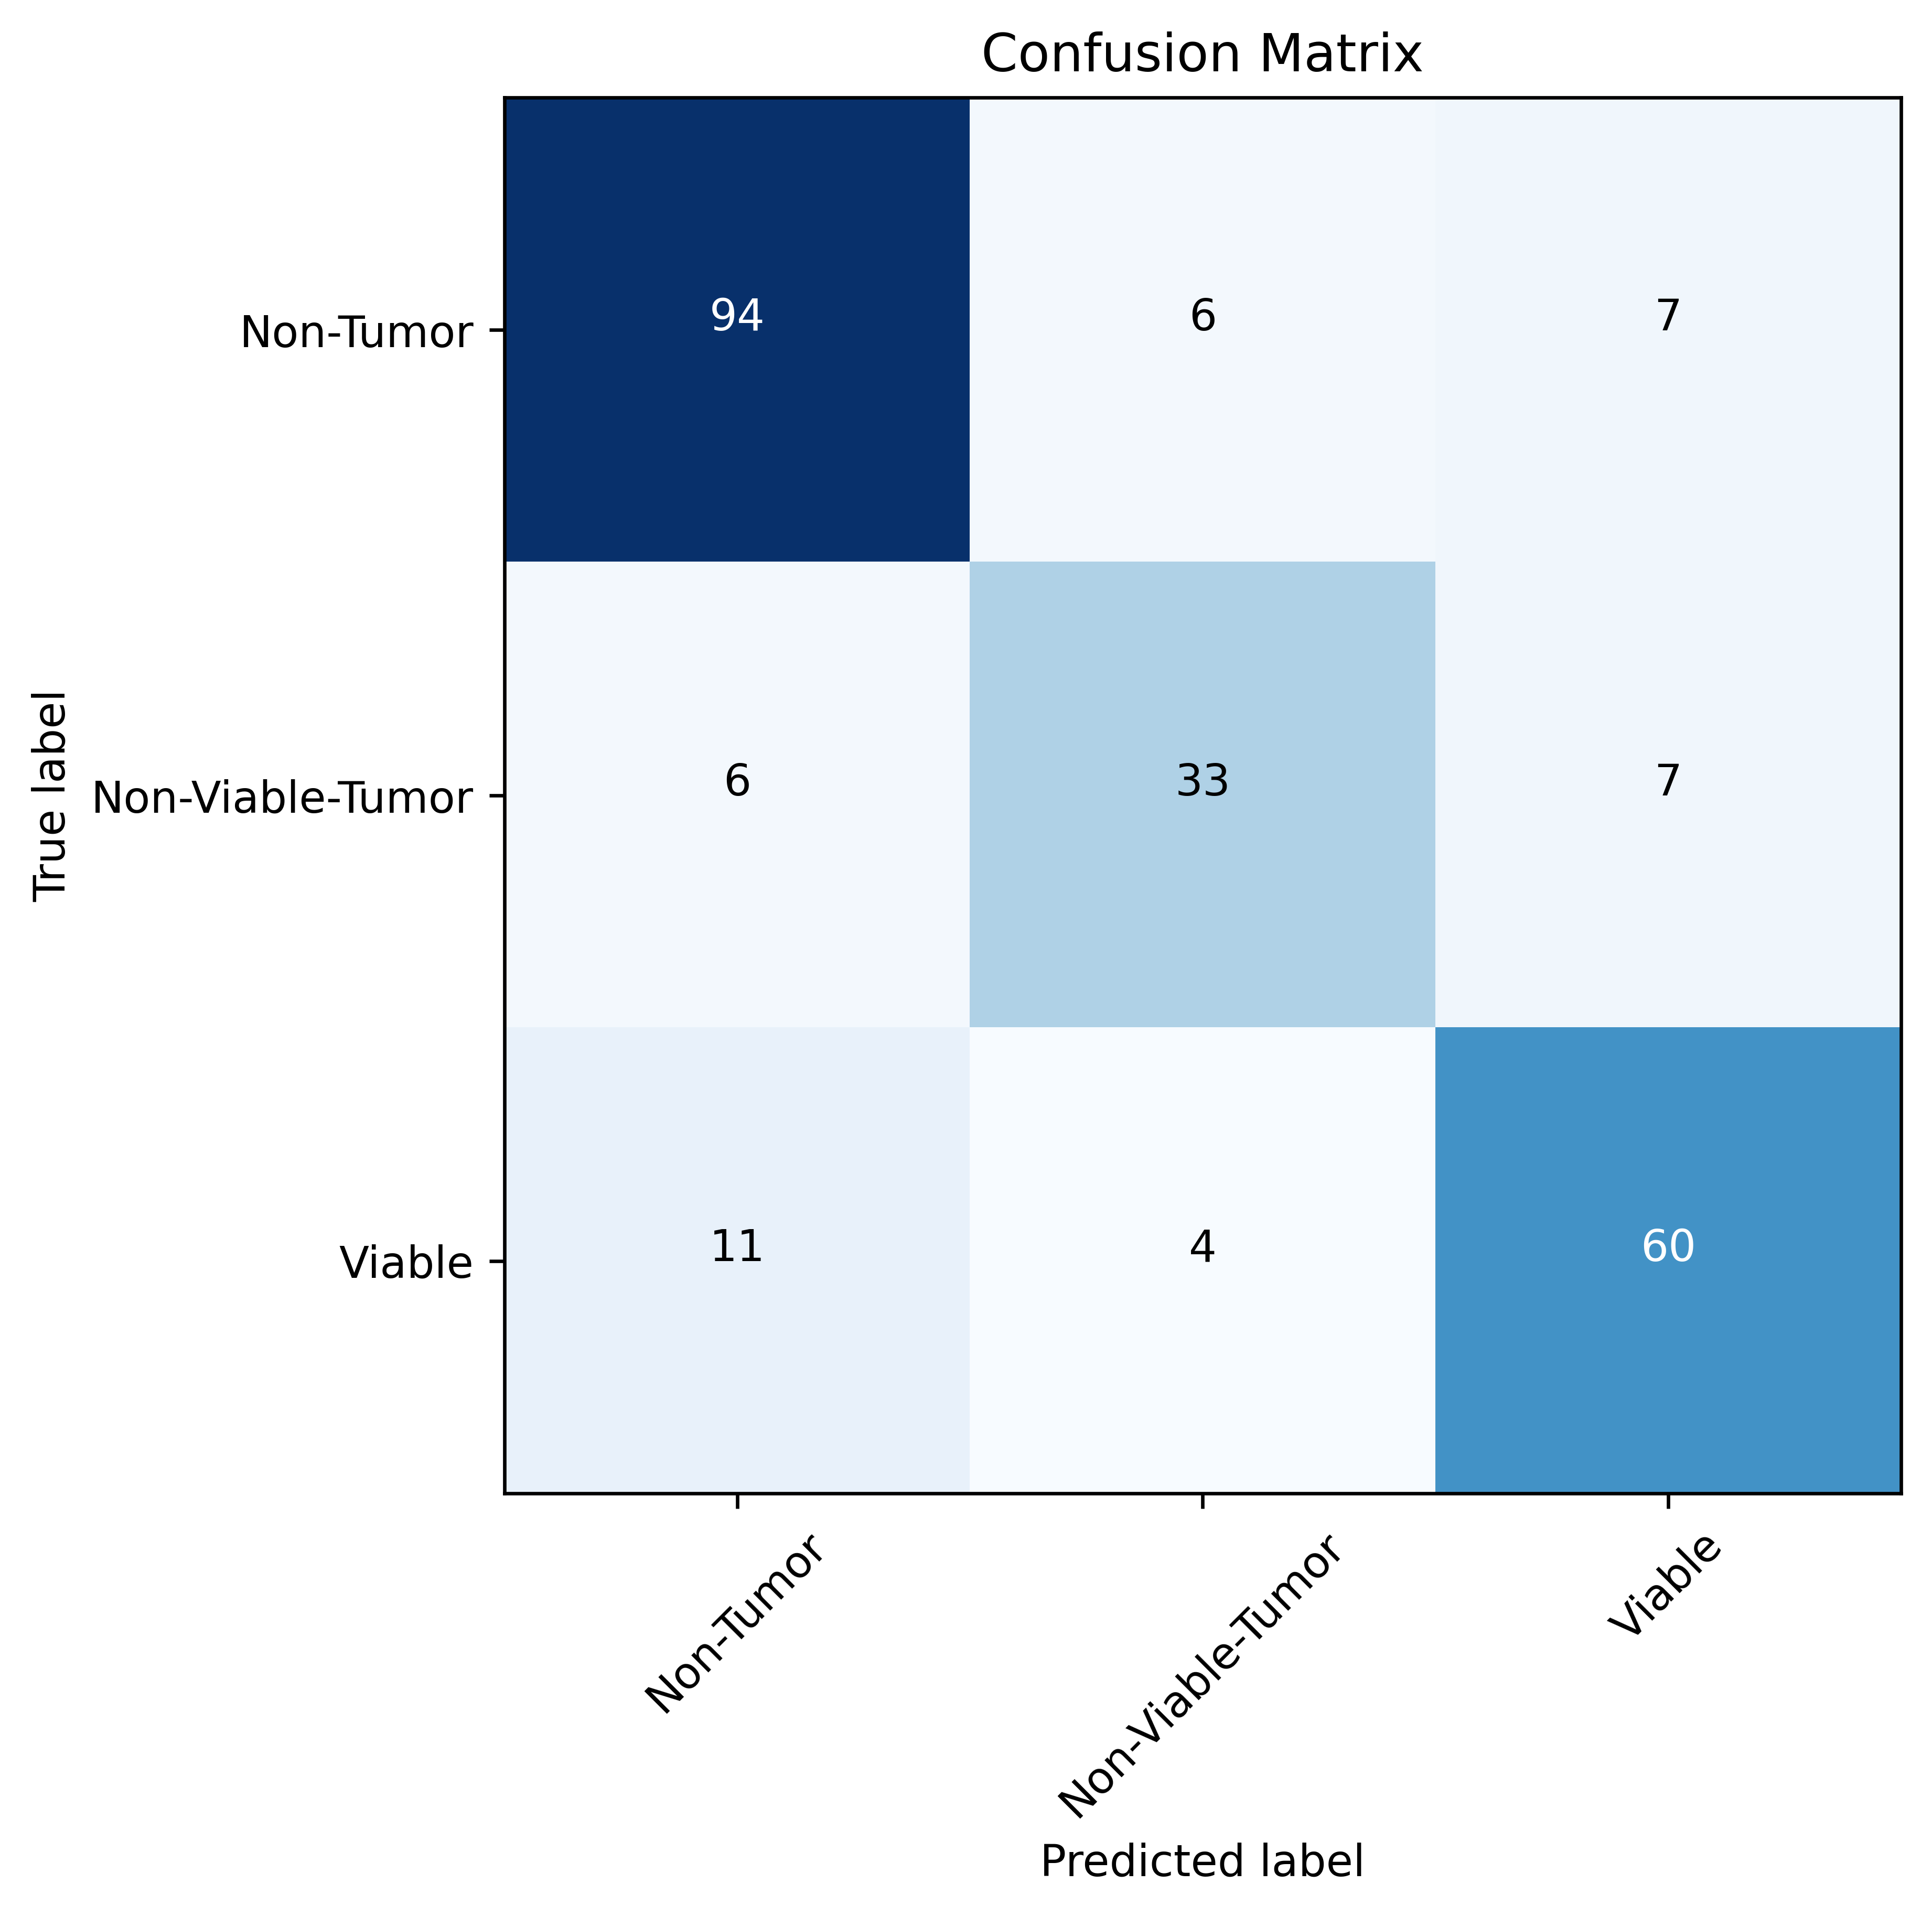

In [ ]:
# getting confusion matrix
conf_matrix = confusion_matrix(y_test, mlp_pred)

# plotting confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

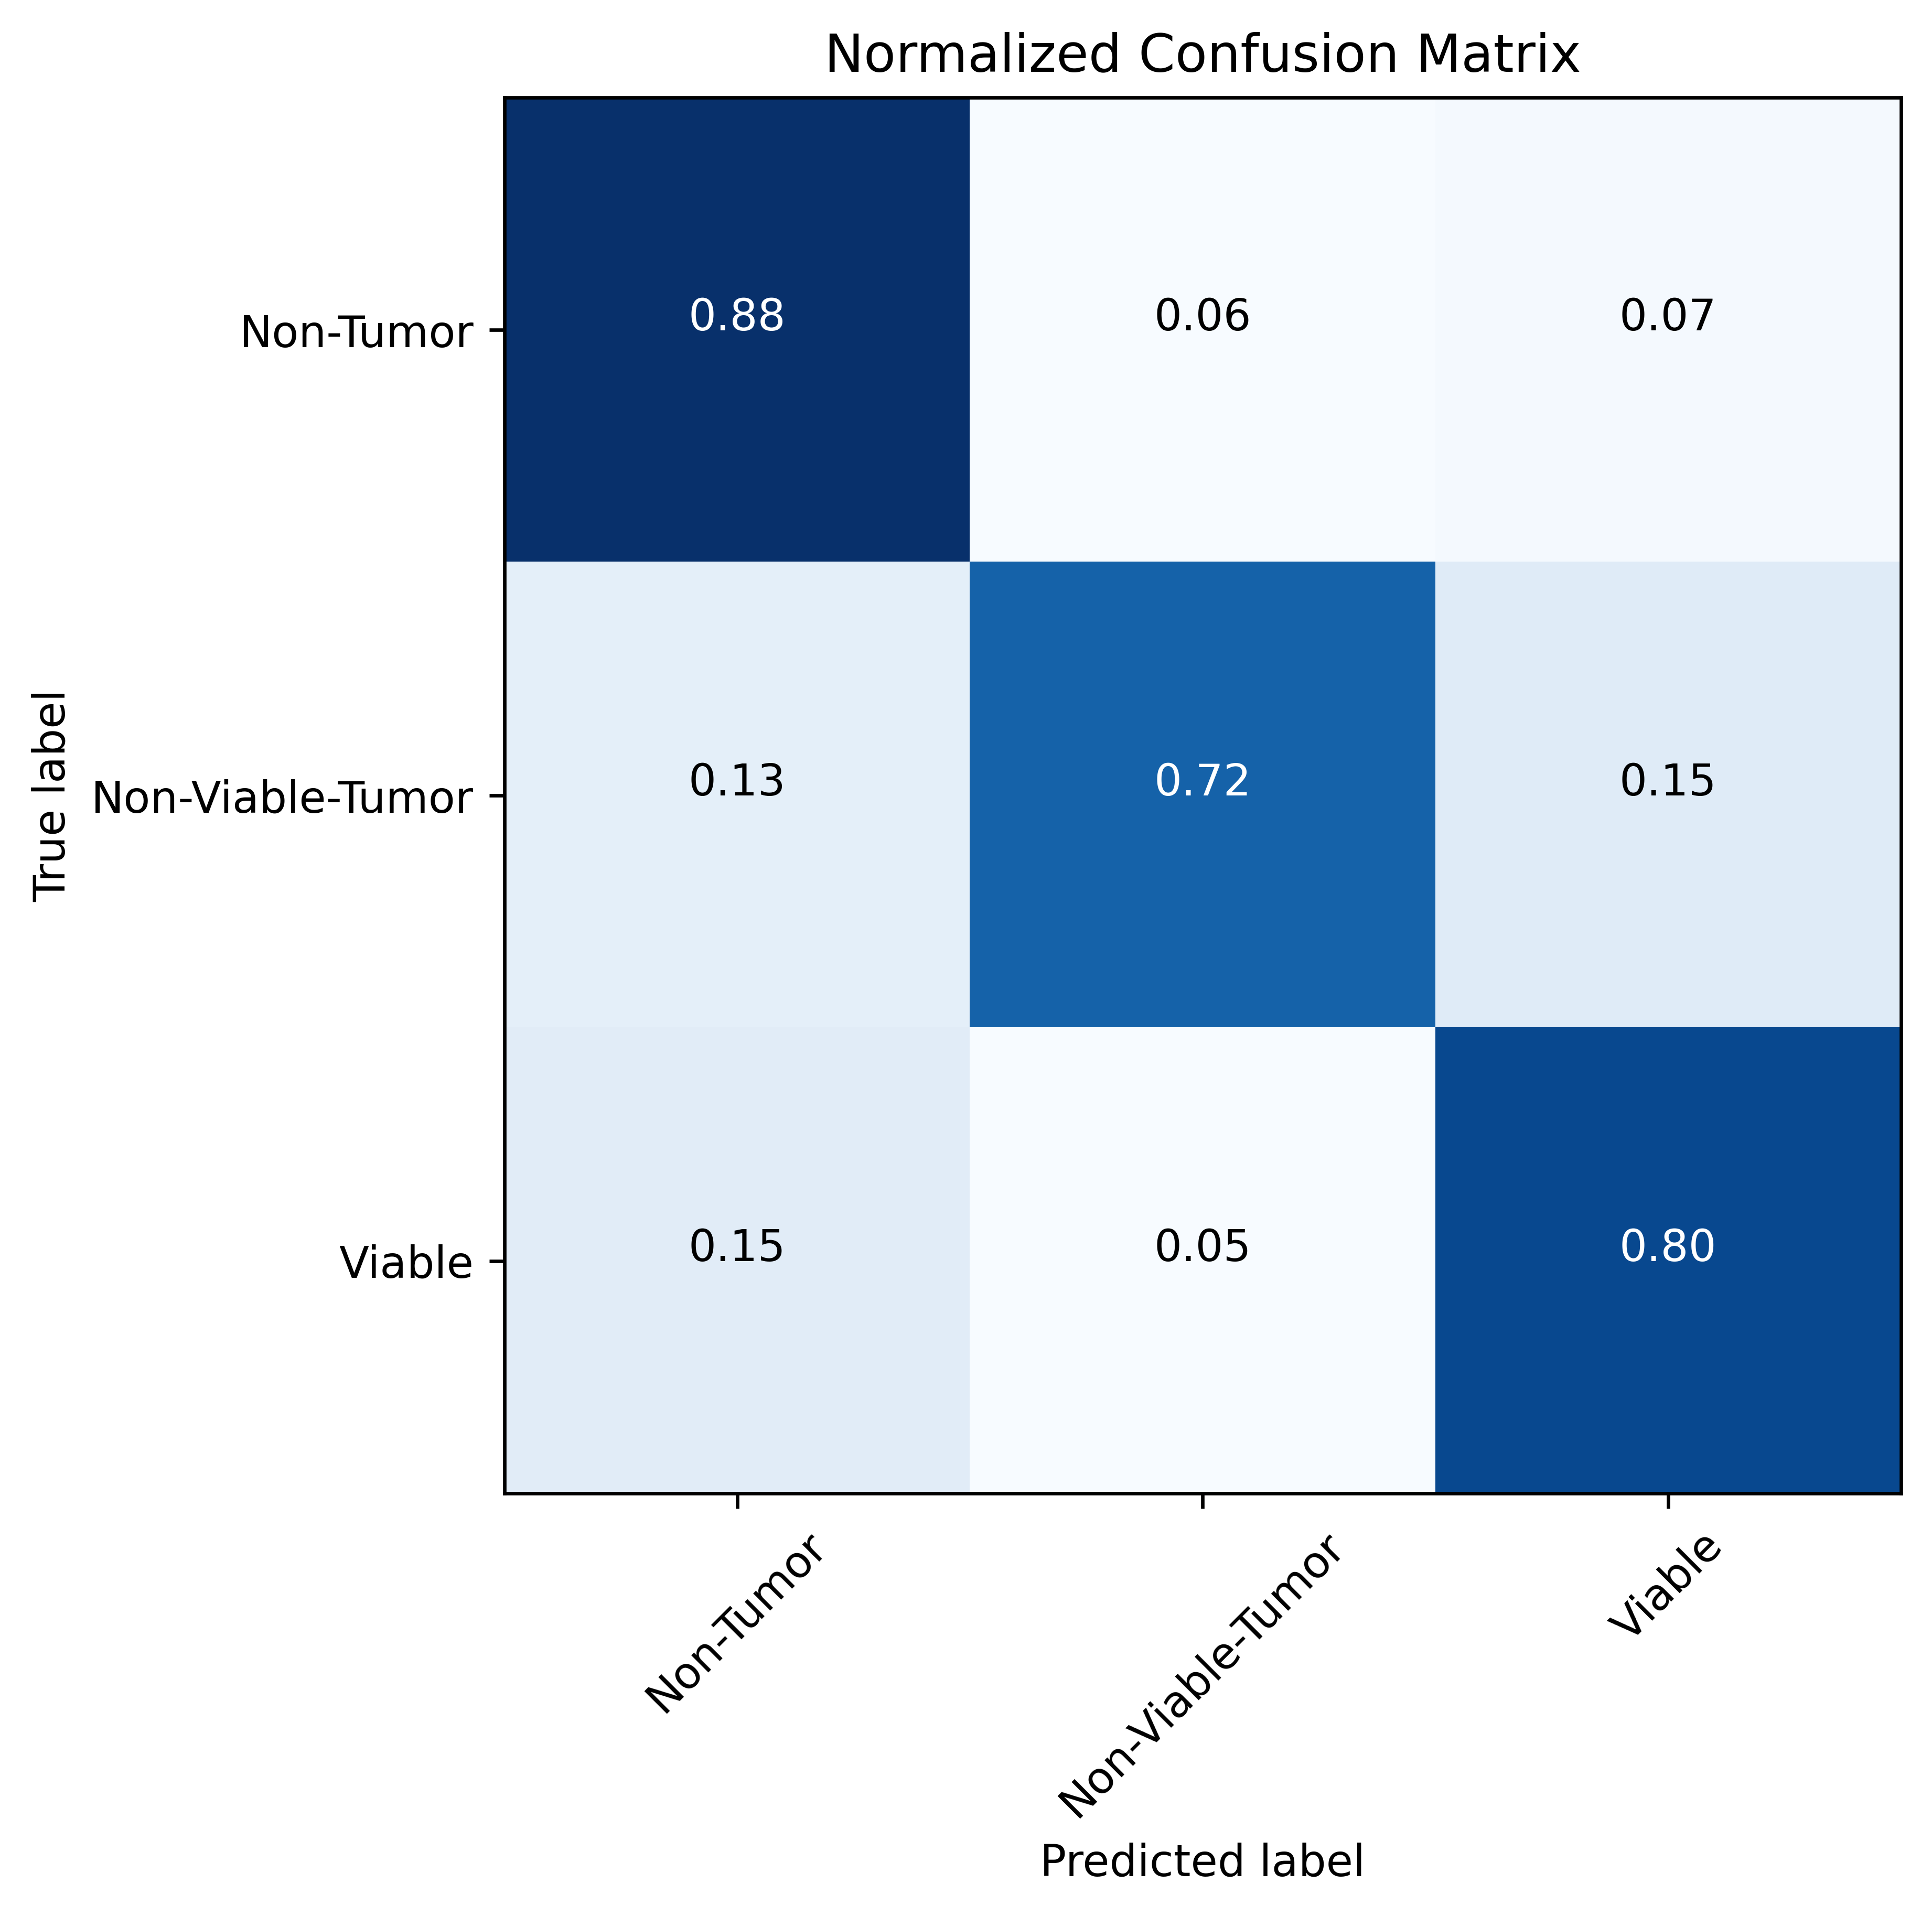

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**Classification report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.77      0.72      0.74        46
           2       0.81      0.80      0.81        75

    accuracy                           0.82       228
   macro avg       0.81      0.80      0.80       228
weighted avg       0.82      0.82      0.82       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, mlp_pred)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor        0.847     	      0.797      	   0.845   
  1   Non-Viable-Tumor     0.767     	      0.516      	   0.939   
  2        Viable          0.811      	       0.69      	   0.901   
